In [1]:
import sys
link="/Users/xinyuexu/Public/multi_strategy/code/FOF_in_chinese_market/PYMC/pymc"
sys.path.append(link)
import pymc as pm
import pytensor
import pytensor.tensor as at
import arviz as az
import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd

import pymc.sampling.jax
import seaborn as sns



/Users/xinyuexu/Public/multi_strategy/code/FOF_in_chinese_market/PYMC/pymc/pymc/sampling/jax.py:38: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


In [2]:
#import warnings
#warnings.simplefilter(action="ignore", category=FutureWarning)
#from datetime import date
#today_for_api  = str(date.today())
import pandas as pd
import numpy as np
#######图形模版
import seaborn as sns
cm=sns.color_palette("Spectral", as_cmap=True)
#cm = sns.light_palette("Spectral", as_cmap=True)
import matplotlib.pyplot as plt
plt.style.use("bmh")
font = ['Songti SC']
parameters = {'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          "font.family" : "sans-serif",
          "font.sans-serif":font,
          'font.size':15,
          "axes.unicode_minus":False}
plt.rcParams.update(parameters)

# 数据加载：宏观、指数、alpha的数据

In [3]:
import pickle
f2 = open('temp.pkl', 'rb')  
macro_data = pickle.load(f2)  
macro_zscore = pickle.load(f2)  
index_orig = pickle.load(f2)  
index_transformer = pickle.load(f2)  
df_fund = pickle.load(f2)  
df_fund.index=df_fund.index.to_period("M")
f2.close() 

df_ret_ratio=index_orig

# 基于月度数据夏普估计：夏普方法2

#Whitelaw（1997）


index_sharpe=index_orig

df_ret_ratio_mean_monthly=index_sharpe.resample("M").sum()
df_ret_ratio_std_monthly=np.sqrt((df_ret_ratio**2).resample("M").sum())
df_sharpe =df_ret_ratio_mean_monthly/df_ret_ratio_std_monthly

df_sharpe.mean()


MSCI中国A股(人民币)          0.155037
MSCI中国A股在岸低波(人民币)      0.205786
MSCI中国A股在岸公司质量(人民币)    0.225771
MSCI中国A股在岸价值(人民币)      0.124020
MSCI中国A股在岸成长(人民币)      0.162680
MSCI中国A股在岸中小盘(人民币)     0.202491
MSCI中国A股在岸动能(人民币)      0.156768
dtype: float64

# 数据处理：先验信息

In [4]:

model_begin_date="2012-09-01"

index_transformer_month= index_transformer.resample("M").sum()



df_data = pd.DataFrame(columns = ["Period"]).set_index("Period")
date_model =pd.date_range(start=model_begin_date,end="2022-09-01",freq="M").to_period("M")
df_data.index=date_model
df_data["Test_"] = "True"



df_macro_filter = pd.concat([df_data,macro_zscore.shift(3)],axis=1).query('Test_=="True"')
df_macro_filter_predict = pd.concat([df_data,macro_zscore],axis=1).query('Test_=="True"')

df_Factor_filter=pd.concat([df_data,index_transformer_month],axis=1).query('Test_=="True"')
data_alpha_filter =pd.concat([df_data,df_fund],axis=1).query('Test_=="True"')
data_alpha_filter= data_alpha_filter.dropna(axis=1)

data_total =pd.concat([df_Factor_filter.drop("Test_",axis=1),data_alpha_filter.drop("Test_",axis=1)],axis=1).T


Df_macro = df_macro_filter.drop("Test_",axis=1).T
Df_macro_predict = df_macro_filter_predict.drop("Test_",axis=1).T


Df_Factor=(df_Factor_filter.drop("Test_",axis=1).T)*12
Df_alpha=(data_alpha_filter.drop("Test_",axis=1).T)*12











## RANDOM_SEED = 8924
Df_model_example = Df_macro.head(1)














In [27]:



#import recombinator

from recombinator.block_bootstrap import circular_block_bootstrap

y_star_cb   = circular_block_bootstrap(df_sharpe, 
                               block_length=36, 
                               replications=500, 
                               replace=True)




IR_estimate_from_bootstrap = np.zeros((500,np.shape(y_star_cb)[2]))
for b in range(500):
       IR_estimate_from_bootstrap[b,:] =  np.mean(y_star_cb[b,:,:],axis=0)
IR_mean=IR_estimate_from_bootstrap.mean(axis=0)

IR_sample_std=IR_estimate_from_bootstrap.std(axis=0)

prior_mu = np.array([x for x in IR_mean])
prior_std = np.array([x for x in IR_sample_std])



In [59]:
# f_ = open('temp_model1218.pkl', 'wb')  

# pickle.dump(Df_macro, f_)
# pickle.dump(Df_model_example, f_)
# pickle.dump(Df_macro_predict, f_)
# pickle.dump(Df_Factor, f_)

# pickle.dump(Df_alpha, f_)
# pickle.dump(df_sharpe, f_)
# pickle.dump(data_total, f_)
# pickle.dump(prior_mu, f_)
# pickle.dump(prior_std, f_)

# f_.close()  










# 模型准备(开始)

In [ ]:
import sys
link="/Users/xinyuexu/Public/multi_strategy/code/FOF_in_chinese_market/PYMC/pymc"
sys.path.append(link)
import pymc as pm
import pytensor
import pytensor.tensor as at
import arviz as az
import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd

import pymc.sampling.jax
import seaborn as sns

cm=sns.color_palette("Spectral", as_cmap=True)
#cm = sns.light_palette("Spectral", as_cmap=True)
import matplotlib.pyplot as plt
plt.style.use("bmh")
font = ['Songti SC']
parameters = {'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          "font.family" : "sans-serif",
          "font.sans-serif":font,
          'font.size':15,
          "axes.unicode_minus":False}
plt.rcParams.update(parameters)

In [2]:
import pickle
f3 = open('temp_model1218.pkl', 'rb')  
Df_macro = pickle.load(f3)  
Df_model_example = pickle.load(f3)  
Df_macro_predict = pickle.load(f3)  
Df_Factor = pickle.load(f3)  
Df_alpha = pickle.load(f3)  
df_sharpe = pickle.load(f3)  
data_total=pickle.load(f3)
prior_mu=pickle.load(f3)
prior_std=pickle.load(f3)
f3.close() 



import pandas as pd
macro_dim =Df_model_example.shape[0]
fund_dim= Df_Factor.shape[0]
model_dim =data_total.shape[0]
date_model =pd.date_range(start="2012-09-01",end="2022-09-01",freq="M").to_period("M")


model_dim_T=date_model.shape[0]
alpha_mean__prior =0.36
alpha_std__prior =0.17
LKJ_eta__prior =3
LKJ_st__prior =1.0
LKJ_st_prior =1.0
T_len=model_dim_T
__Df_alpha_model=Df_alpha
alpha_len = __Df_alpha_model.shape[0]




fund_dim= Df_Factor.shape[0]
model_dim =data_total.shape[0]
model_dim_T=date_model.shape[0]
coords_test = {"Fund": Df_Factor.index.values, "date":data_total.columns.to_timestamp().astype("int"),"macro":Df_model_example.index.values,"Alpha":__Df_alpha_model.index.values}


In [5]:
#Df_macro_example_predict.values.astype(float)

# 单一模型测试：以dy为例子

In [6]:
import numpy as np
RANDOM_SEED = 8924

In [5]:
with pm.Model(coords=coords_test) as model_total_dy:
        # --- data containers ---#
        macro_data = pm.Data("宏观因子", Df_model_example.values.astype(float),mutable=True,dims=("macro","date"))
        sr_t = pm.MutableData(name="夏普抽样数据自回归项", value=df_sharpe.loc["2012-09":"2022-08"].T.values, dims=("Fund","date"))


        # --- prior ---#
        sharpe_ratio= pm.Normal("夏普比例先验", prior_mu.T, prior_std, dims=("Fund"))
        sharpe_ratio=at.reshape(sharpe_ratio,(fund_dim,1))

        beta = pm.Normal("宏观因子反应系数:指数/因子条件夏普SR", mu=0, sigma=1,shape=(fund_dim,macro_dim),dims=("Fund","macro"))


        macro_contribution = pm.Deterministic(
            name="宏观因子贡献",
            var=pm.math.dot(beta,macro_data),
            dims=("Fund","date"),
        )




        delta = pm.Beta(name="条件夏普比例预测系数detla:条件夏普自回归项SR", alpha=10, beta=10)
        eta = pm.Gamma(name="夏普样本数据预测系数eta:夏普样本数据自回归项sr", alpha=0.5, beta=10)
        
        delta_eta = pm.Deterministic("夏普样本数据预测系数:宏观因子贡献",1-delta-eta)
        # --- model parametrization ---
        #pm.Potential(name="constrain", var=at.switch(eta > 1 - delta, -np.inf, 0))

       # --- damped dynamic mean--@
        sr0 = pm.MutableData(
            name="条件夏普SR自回归项", value=np.zeros((sr_t.shape.eval()[0],sr_t.shape.eval()[1])), dims=("Fund","date")
        )
       
        
        #sr0 = at.zeros((sr_t.shape.eval()[0],sr_t.shape.eval()[1]))
        sr0 = at.set_subtensor(sr0[:,0],sharpe_ratio[:,0])
        def one_step(macro_t,sr_tm1,SR_tm1,delta,eta):
            return (1-delta-eta)*macro_t+eta*sr_tm1+delta*SR_tm1

        
        outputs,_ = pytensor.scan(
            fn=one_step,
            sequences=[
                dict(input=(macro_contribution[:,1:].T),taps=[0]),
                dict(input=(sr_t.T),taps=[-1])
            ],
            outputs_info=dict(initial = (sr0.T),taps=[-1]),
            non_sequences=[delta,eta],
            strict=True,
        )
        
        
        
        sharpe_ratio_t = pm.Deterministic(
            name="条件夏普SR",var=at.set_subtensor(sr0[:,1:],outputs[:,0].T),dims=("Fund","date")
        )

   
        
      
        chol_factor, corr_chol_factor, stds_chol_factor = pm.LKJCholeskyCov("指数/风格基金的协方差矩阵分布", n=fund_dim, eta=LKJ_eta__prior, sd_dist=pm.HalfCauchy.dist(LKJ_st__prior), compute_corr=True)




        __stds_chol_factor =  at.reshape(stds_chol_factor,(fund_dim,1)) 
        __stds_chol_factor_T = at.tile(__stds_chol_factor,(1,T_len)) 

        T_n_cov =np.eye(T_len)
         
        factor_r= pm.Deterministic(name="指数/因子的收益率均值",var=sharpe_ratio_t*__stds_chol_factor_T,dims=("Fund","date"),)
        Factor_obs=pm.MatrixNormal('指数/因子的收益率实现', mu=factor_r, rowchol=chol_factor,colcov=T_n_cov,observed=Df_Factor,dims=("Fund","date"))


    

        


        ############################################
        ############################################
        ###############################################
        ############################################
        
        
        factor_loading = pm.Normal("主动基金的因子载荷", mu=0, sigma=2,shape=fund_dim,dims=("Fund"))
        factor_loading= at.reshape(factor_loading,(1,fund_dim))                       
        factor_contribution = pm.Deterministic(name="主动基金收益:因子暴露部分",var=pm.math.dot(factor_loading,factor_r))
        factor_contribution =at.reshape(factor_contribution,(1,T_len)) 
        factor_loading_sum_stack=at.tile(factor_contribution,(alpha_len,1))  
        
        chol, corr, stds = pm.LKJCholeskyCov("基金的协方差矩阵分布", n=alpha_len, eta=LKJ_eta__prior, sd_dist=pm.HalfCauchy.dist(LKJ_st__prior), compute_corr=True)
        __stds =  at.reshape(stds,(alpha_len,1)) 
        __stds_t = at.tile(__stds,(1,T_len)) 
        
        
        alpha = pm.Normal("主动基金纯粹阿尔法的共同先验",alpha_mean__prior, alpha_std__prior)
        alpha_n = pm.Normal("主动基金纯粹阿尔法的层次先验",alpha,sigma=1,shape=alpha_len,dims=("Alpha"))
       
        IC_alpha_t = pm.Deterministic("主动基金信息比例IC", alpha_n/stds,dims =("Alpha"))
        
        alpha_n= at.reshape(alpha_n,(alpha_len,1))

        fund_ret = pm.Deterministic("主动基金收益率均值:因子暴露与纯粹阿尔法",at.tile(alpha_n,(1,T_len)) + factor_loading_sum_stack,dims=("Alpha","date"))

  

        T_n_cov =np.eye(T_len)

        obs_sharpe=pm.MatrixNormal('主动基金的收益率实现', mu=fund_ret, rowchol=chol,colcov=T_n_cov,observed=__Df_alpha_model.values,dims=("Alpha","date"))

        RANDOM_SEED = 8924
    
        trace_alpha_total_dy= pm.sample(target_accept=0.85, tune=500,draws=1000, chains=1,return_inferencedata = True,idata_kwargs = {'log_likelihood': True})
    
   

    


NameError: name 'coords_test' is not defined

In [45]:

Df_macro_example_predict = Df_macro_predict.loc[["dy"]]
with model_total_dy:
    pm.set_data({"宏观因子": Df_macro_example_predict.values.astype(float)})
    trace_alpha_total_dy = pm.sample_posterior_predictive(
        trace_alpha_total_dy,
    var_names=["条件夏普SR","指数/因子的收益率实现","主动基金的收益率实现"],
    return_inferencedata=True,
    predictions=True,
    extend_inferencedata=True,
    random_seed=RANDOM_SEED,
    )

Sampling: [主动基金的收益率实现, 指数/因子的收益率实现]
INFO:pymc:Sampling: [主动基金的收益率实现, 指数/因子的收益率实现]


In [84]:
np.reshape(IC_alpha_t.shape.eval(),10)

ValueError: cannot reshape array of size 2 into shape (10,)

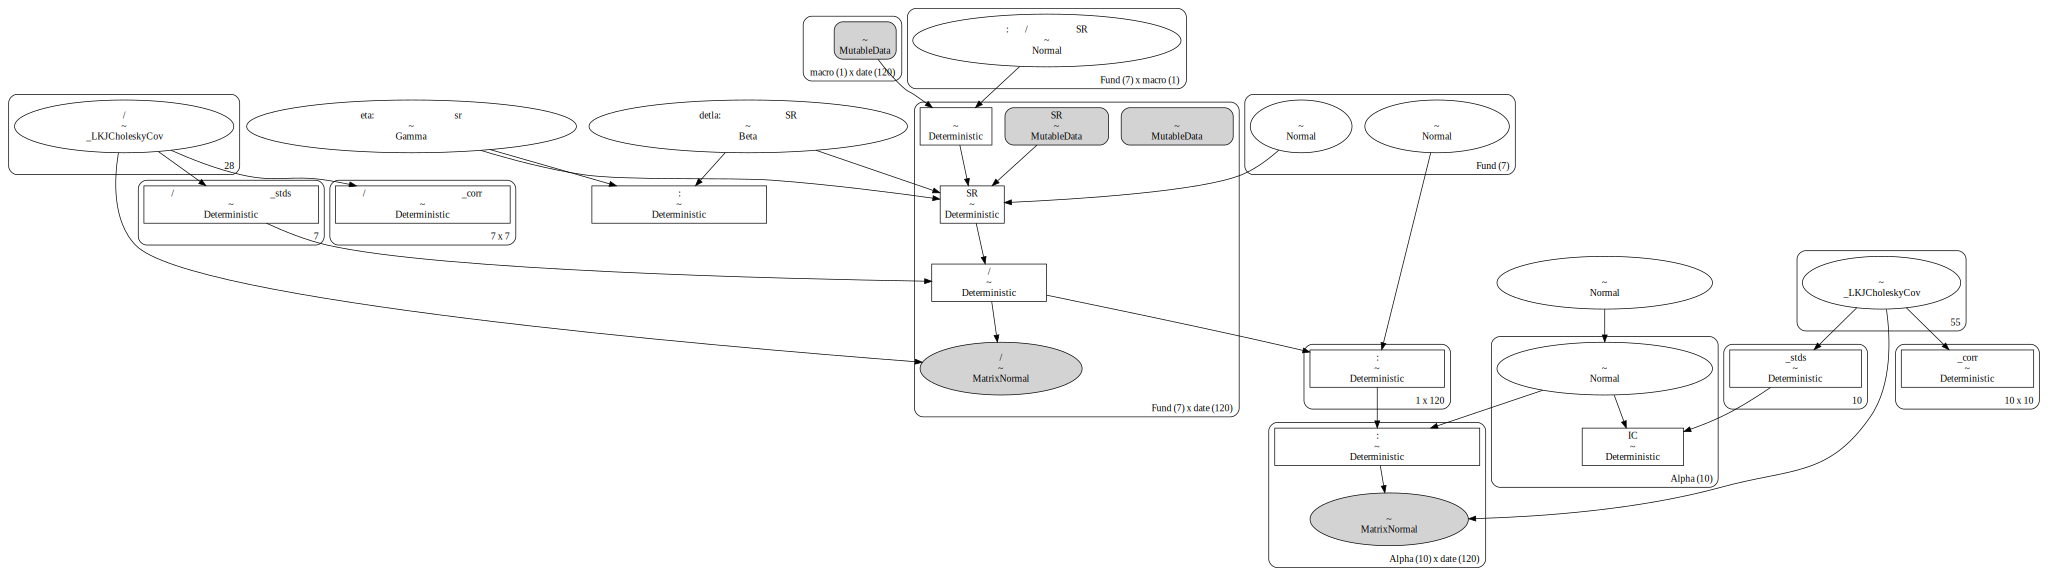

In [26]:
pm.model_to_graphviz(model_total_dy)

In [30]:
__Df_alpha_model.index.values

array(['交银趋势混合A', '浦银安盛精致生活混合', '景顺长城中小盘混合', '金鹰红利价值混合A', '南方上证380ETF联接A',
       '金鹰中小盘精选混合', '融通内需驱动混合A/B', '国泰价值经典灵活配置混合(LOF)', '国泰金鹰增长灵活配置混合',
       '华夏盛世混合'], dtype=object)

array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

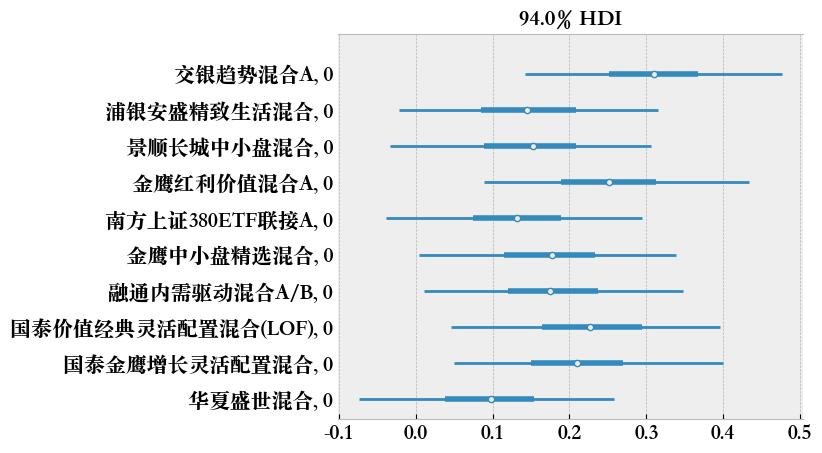

In [31]:
az.plot_forest(
    trace_alpha_total_dy,
    var_names=["主动基金信息比例IC"],
    combined=True,
    coords={"Alpha":__Df_alpha_model.index.values},
    labeller=az.labels.NoVarLabeller(),
)

In [35]:
x=trace_alpha_total_dy.posterior.stack(pooled_chain=("chain", "draw"))["条件夏普SR"][0].date

In [36]:
TT_figure=x.astype('datetime64[ns]')

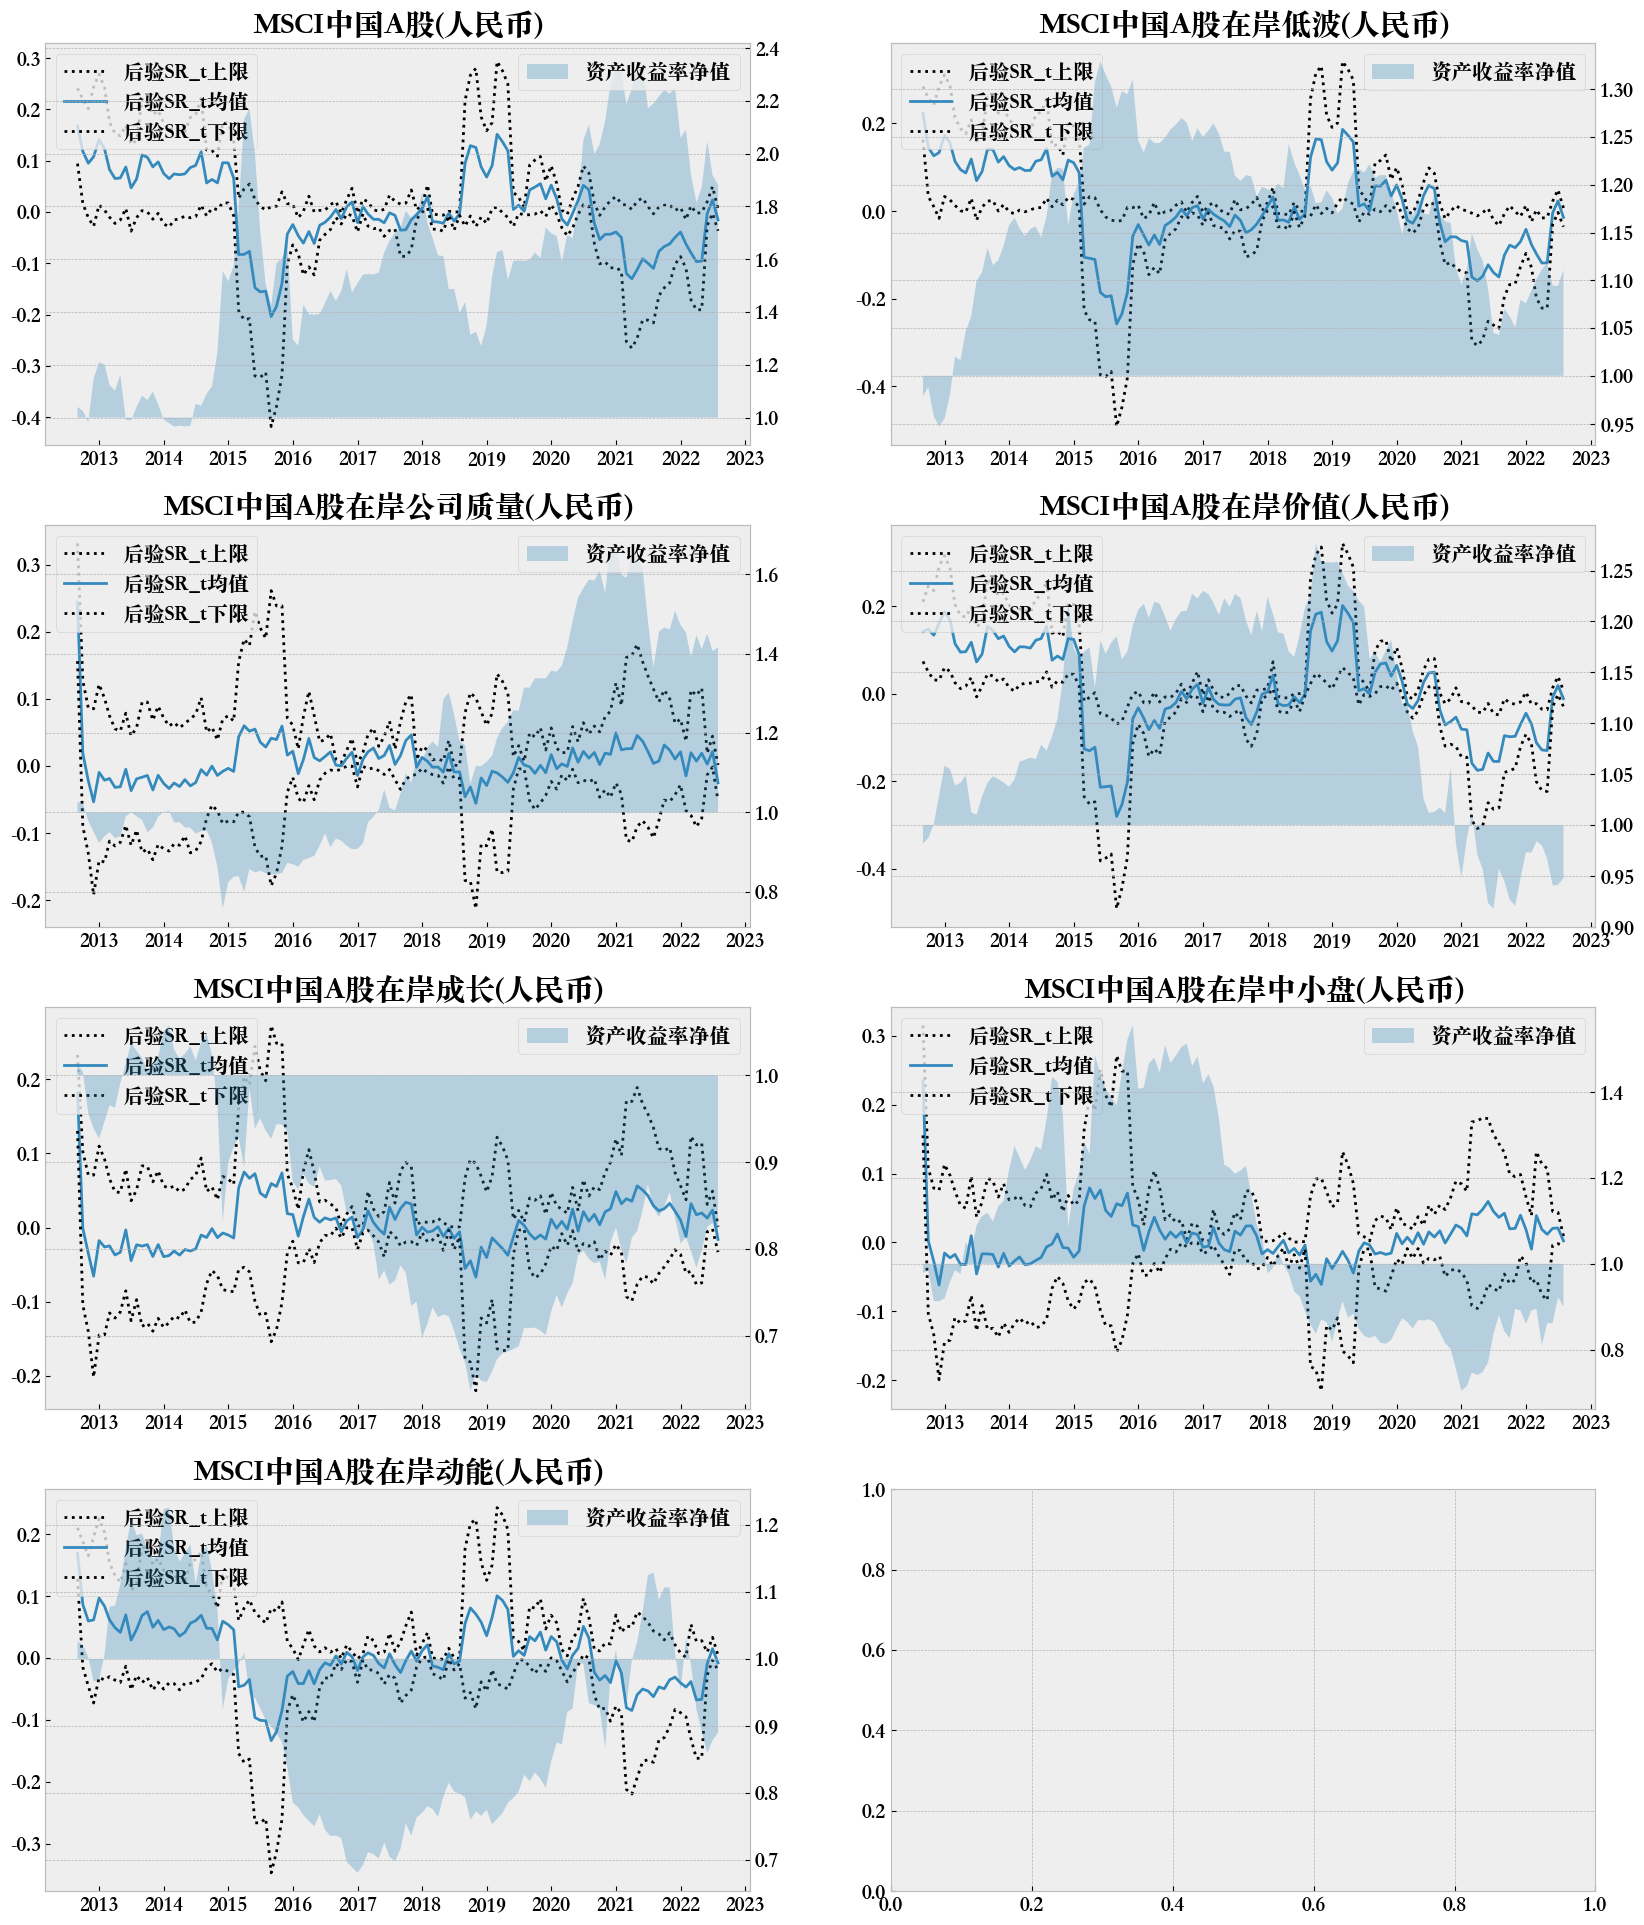

In [37]:

fig,ax =plt.subplots(4,2,figsize=(20,4*6))
ax=ax.flatten()
SR_t_mean_fig=trace_alpha_total_dy.posterior.stack(pooled_chain=("chain", "draw"))["条件夏普SR"].mean(axis=2)
SR_t_std_fig=trace_alpha_total_dy.posterior.stack(pooled_chain=("chain", "draw"))["条件夏普SR"].std(axis=2)


data_fund=np.exp((Df_Factor/12).T.cumsum())
for i in range(fund_dim):
  
    
    #TT_figure= _xx+T_begin
    
    
    ax[i].plot(TT_figure,SR_t_mean_fig[i]+1*SR_t_std_fig[i],':',color="k",label="后验SR_t上限")
    ax[i].plot(TT_figure,SR_t_mean_fig[i],label="后验SR_t均值")
    ax[i].plot(TT_figure,SR_t_mean_fig[i]-1*SR_t_std_fig[i],':',color="k",label="后验SR_t下限")
    ax[i].set_title(Df_Factor.index.values[i])
    ax[i].legend(loc=2)
    ax[i].grid()
    
    
    ax_right = ax[i].twinx()
    
    #__drawdown =(draw_down_price[i] - draw_down_price[i+"_max"])/draw_down_price[i+"_max"]
    #print(__drawdown)
    ax_right.fill_between(TT_figure,data_fund[Df_Factor.index.values[i]],1,alpha=0.3,label="资产收益率净值")
    ax_right.legend(loc=1)

In [61]:
trace_alpha_total_dy

Inference data with groups:
	> posterior
	> predictions
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

In [39]:
az.summary(trace_alpha_total_dy, var_names=["宏观因子反应系数:指数/因子条件夏普SR"], round_to=2)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_3%  hdi_97%  \
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股(人民币), dp]        0.06  0.07   -0.06     0.21   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸低波(人民币), dp]    0.08  0.08   -0.06     0.22   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸公司质量(人民币), dp] -0.02  0.07   -0.15     0.12   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸价值(人民币), dp]    0.09  0.07   -0.04     0.22   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸成长(人民币), dp]   -0.02  0.07   -0.15     0.11   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸中小盘(人民币), dp]  -0.02  0.07   -0.16     0.11   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸动能(人民币), dp]    0.04  0.07   -0.08     0.18   

                                               mcse_mean  mcse_sd  ess_bulk  \
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股(人民币), dp]              0.0      0.0   1026.05   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸低波(人民币), dp]          0.0      0.0   1017.79   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸公司质量(人民币), dp]        0.0      0.0    773.89   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸价值(人民币), dp]          0.0      0.0    633.84   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸成长(人民币), dp]          0.0      0.0    535.69   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸中小盘(人民币), dp]         0.0      0.0    790.77   
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸动能(人民币), dp]          0.0      0.0    810.92   

                                               ess_tail  r_hat  
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股(人民币), dp]          847.04    NaN  
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸低波(人民币), dp]      587.50    NaN  
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸公司质量(人民币), dp]    693.52    NaN  
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸价值(人民币), dp]      793.10    NaN  
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸成长(人民币), dp]      629.68    NaN  
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸中小盘(人民币), dp]     491.88    NaN  
宏观因子反应系数:指数/因子条件夏普SR[MSCI中国A股在岸动能(人民币), dp]      759.25    NaN

In [40]:
#trace_alpha_total_dy.to_netcdf("trace_dy.nc")


# 先验检查

In [ ]:
#with model_total_dy:
#     temp_prior_predictive = pm.sample_prior_predictive(samples=1000)

# df_figure = Df_Factor.T.reset_index()
# df_figure["index"]=Df_Factor.columns.to_timestamp()




# 多个模型sample抽样

In [57]:
coords_test = {"Fund": Df_Factor.index.values, "date":data_total.columns.to_timestamp().astype("int"),"macro":Df_model_example.index.values,"Alpha":__Df_alpha_model.index.values}


In [91]:

for i in Df_macro.index:
    print(i)
    model_name = "model_total_"+i
    result_name = "trace_alpha_total_"+i
    Df_model_example = Df_macro.loc[[i]]
    
    macro_dim =Df_model_example.shape[0]
    s="""with pm.Model(coords=coords_test) as {}:
        macro_data = pm.Data("宏观因子", Df_model_example.values.astype(float),mutable=True,dims=("macro","date"))
        sr_t = pm.MutableData(name="夏普抽样数据自回归项", value=df_sharpe.loc["2012-09":"2022-08"].T.values, dims=("Fund","date"))
       # --- prior ---#
        sharpe_ratio= pm.Normal("夏普比例先验", prior_mu.T, prior_std, dims=("Fund"))
        sharpe_ratio=at.reshape(sharpe_ratio,(fund_dim,1))

        beta = pm.Normal("宏观因子反应系数:指数/因子条件夏普SR", mu=0, sigma=1,shape=(fund_dim,macro_dim),dims=("Fund","macro"))


        macro_contribution = pm.Deterministic(
            name="宏观因子贡献",
            var=pm.math.dot(beta,macro_data),
            dims=("Fund","date"),
        )

        delta = pm.Beta(name="条件夏普比例预测系数detla:条件夏普自回归项SR", alpha=1, beta=10)
        eta = pm.Gamma(name="夏普样本数据预测系数eta:夏普样本数据自回归项sr", alpha=0.5, beta=10)

        delta_eta = pm.Deterministic("夏普样本数据预测系数:宏观因子贡献",1-delta-eta)
        # --- model parametrization ---
        #pm.Potential(name="constrain", var=at.switch(eta > 1 - delta, -np.inf, 0))

       # --- damped dynamic mean--@
        sr0 = pm.MutableData(
            name="条件夏普SR自回归项", value=np.zeros((sr_t.shape.eval()[0],sr_t.shape.eval()[1])), dims=("Fund","date")
        )


        #sr0 = at.zeros((sr_t.shape.eval()[0],sr_t.shape.eval()[1]))
        sr0 = at.set_subtensor(sr0[:,0],sharpe_ratio[:,0])
        def one_step(macro_t,sr_tm1,SR_tm1,delta,eta):
            return (1-delta-eta)*macro_t+eta*sr_tm1+delta*SR_tm1


        outputs,_ = pytensor.scan(
            fn=one_step,
            sequences=[
                dict(input=(macro_contribution[:,1:].T),taps=[0]),
                dict(input=(sr_t.T),taps=[-1])
            ],
            outputs_info=dict(initial = (sr0.T),taps=[-1]),
            non_sequences=[delta,eta],
            strict=True,
        )



        sharpe_ratio_t = pm.Deterministic(
            name="条件夏普SR",var=at.set_subtensor(sr0[:,1:],outputs[:,0].T),dims=("Fund","date")
        )




        chol_factor, corr_chol_factor, stds_chol_factor = pm.LKJCholeskyCov("指数/风格基金的协方差矩阵分布", n=fund_dim, eta=LKJ_eta__prior, sd_dist=pm.HalfCauchy.dist(LKJ_st__prior), compute_corr=True)




        __stds_chol_factor =  at.reshape(stds_chol_factor,(fund_dim,1)) 
        __stds_chol_factor_T = at.tile(__stds_chol_factor,(1,T_len)) 

        T_n_cov =np.eye(T_len)

        factor_r= pm.Deterministic(name="指数/因子的收益率均值",var=sharpe_ratio_t*__stds_chol_factor_T,dims=("Fund","date"),)
        Factor_obs=pm.MatrixNormal('指数/因子的收益率实现', mu=factor_r, rowchol=chol_factor,colcov=T_n_cov,observed=Df_Factor,dims=("Fund","date"))



        ############################################
        ############################################
        ###############################################
        ############################################
        factor_loading = pm.Normal("主动基金的因子载荷", mu=0, sigma=2,shape=fund_dim,dims=("Fund"))
        factor_loading= at.reshape(factor_loading,(1,fund_dim))                       
        factor_contribution = pm.Deterministic(name="主动基金收益:因子暴露部分",var=pm.math.dot(factor_loading,factor_r))
        factor_contribution =at.reshape(factor_contribution,(1,T_len)) 
        factor_loading_sum_stack=at.tile(factor_contribution,(alpha_len,1))  
        
        chol, corr, stds = pm.LKJCholeskyCov("基金的协方差矩阵分布", n=alpha_len, eta=LKJ_eta__prior, sd_dist=pm.HalfCauchy.dist(LKJ_st__prior), compute_corr=True)
        __stds =  at.reshape(stds,(alpha_len,1)) 
        __stds_t = at.tile(__stds,(1,T_len)) 
        
        
        alpha = pm.Normal("主动基金纯粹阿尔法的共同先验",alpha_mean__prior, alpha_std__prior)
        alpha_n = pm.Normal("主动基金纯粹阿尔法的层次先验",alpha,sigma=1,shape=alpha_len,dims=("Alpha"))

  
        IC_alpha_t = pm.Deterministic("主动基金信息比例IC", alpha_n/stds,dims =("Alpha"))
        
        alpha_n= at.reshape(alpha_n,(alpha_len,1))

        
        
        fund_ret = pm.Deterministic("主动基金收益率均值:因子暴露与纯粹阿尔法",at.tile(alpha_n,(1,T_len)) + factor_loading_sum_stack,dims=("Alpha","date"))

  

        T_n_cov =np.eye(T_len)

        obs_sharpe=pm.MatrixNormal('主动基金的收益率实现', mu=fund_ret, rowchol=chol,colcov=T_n_cov,observed=__Df_alpha_model.values,dims=("Alpha","date"))


    """.format(model_name)
    exec(s)


    RANDOM_SEED = 8924
    h="""with {}:
        {} = pm.sample(target_accept=0.85, tune=500,draws=1000, chains=1,return_inferencedata = True,idata_kwargs = {{'log_likelihood': True}})
    """.format(model_name,result_name)
    exec(h)
    Df_macro_example_predict = Df_macro_predict.loc[[i]]
    e="""with {}:
        pm.set_data({{"宏观因子": Df_macro_example_predict.values.astype(float)}})
        {} = pm.sample_posterior_predictive(
            {},
        var_names=["条件夏普SR","指数/因子的收益率实现","主动基金的收益率实现"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=True,
        random_seed=RANDOM_SEED,
    )""".format(model_name,result_name,result_name)
    exec(e)

    files="trace_{}.nc".format(i)
    save_="""trace_alpha_total_{}.to_netcdf('{}')""".format(i,files)
    exec(save_)

    
    
##__Df_alpha_fit_data_model=__Df_alpha_model.values[~np.isnan(__Df_alpha_model.values)]


#alpha_fit_variable = obs_sharpe[~np.isnan(__Df_alpha_model.values)]
#obss=pm.Normal("_IC",alpha_fit_variable,sigma=0.00001,observed=__Df_alpha_fit_data_model)

dp


Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
INFO:pymc:Sequential sampling (1 chains in 1 job)
NUTS: [夏普比例先验, 宏观因子反应系数:指数/因子条件夏普SR, 条件夏普比例预测系数detla:条件夏普自回归项SR, 夏普样本数据预测系数eta:夏普样本数据自回归项sr, 指数/风格基金的协方差矩阵分布, 主动基金的因子载荷, 基金的协方差矩阵分布, 主动基金纯粹阿尔法的共同先验, 主动基金纯粹阿尔法的层次先验]
INFO:pymc:NUTS: [夏普比例先验, 宏观因子反应系数:指数/因子条件夏普SR, 条件夏普比例预测系数detla:条件夏普自回归项SR, 夏普样本数据预测系数eta:夏普样本数据自回归项sr, 指数/风格基金的协方差矩阵分布, 主动基金的因子载荷, 基金的协方差矩阵分布, 主动基金纯粹阿尔法的共同先验, 主动基金纯粹阿尔法的层次先验]


/Users/xinyuexu/opt/anaconda3/envs/FOF02/lib/python3.9/site-packages/pytensor/compile/function/types.py:972: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 619 seconds.
INFO:pymc:Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 619 seconds.
/Users/xinyuexu/opt/anaconda3/envs/FOF02/lib/python3.9/site-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Sampling: [主动基金的收益率实现, 指数/因子的收益率实现]
INFO:pymc:Sampling: [主动基金的收益率实现, 指数/因子的收益率实现]


RuntimeError: NetCDF: Name contains illegal characters

Inference data with groups:
	> posterior
	> predictions
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

In [3]:
import arviz as az
pp=az.InferenceData.from_zarr("yan.")

In [4]:
#import xarray as xr
pp

Inference data with groups:
	> posterior
	> predictions
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

TypeError: to_netcdf() got an unexpected keyword argument 'format'

array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

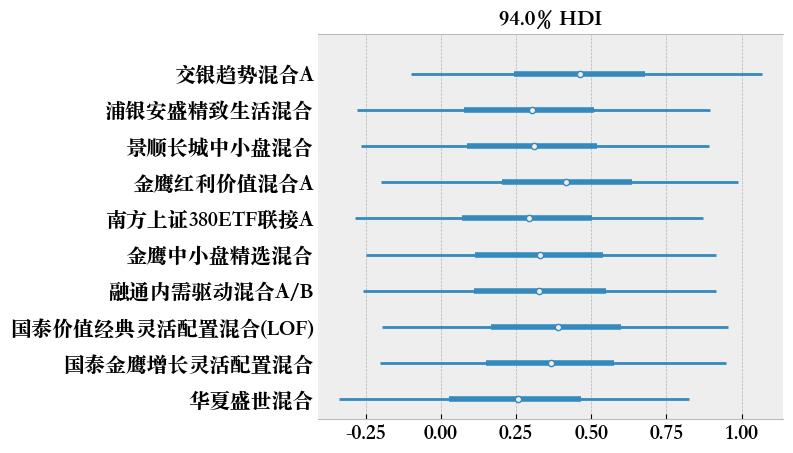

In [24]:
 az.plot_forest(
    trace_alpha_total_dy,
    var_names=["IC_alpha"],
    #kind="ridgeplot",
    combined=True,
    coords={"Alpha":__Df_alpha_model.index.values},
    labeller=az.labels.NoVarLabeller(),
)
    
#     traces=[]
# for i in Df_macro.index:

#     result_name = "trace_alpha_total_"+i
#     traces.append(result_name)
    


## trace数据保存

In [7]:
# for i in Df_macro.index:
#     files="trace_{}.nc".format(i)
#     s="""trace_alpha_total_{}.to_netcdf('{}')""".format(i,files)
#     exec(s)
    

    

#trace_alpha_total_dp.to_netcdf("trace_dp.nc")

# 数据读入（从数据保存：二次运行）

In [7]:
for i in Df_macro.index:
    files="trace_{}.nc".format(i)
    s="""trace_alpha_total_{}= az.from_netcdf('{}')""".format(i,files)
    exec(s)

In [33]:
for i in Df_macro.index:
    model_name = "model_total_"+i
    result_name = "trace_alpha_total_"+i
   
    sss="""with {}:
 
    pm.sample_posterior_predictive({}, extend_inferencedata=True)
    """.format(model_name,result_name)

   
    
    exec(sss)

Inference data with groups:
	> posterior
	> predictions
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

In [27]:

# for i in Df_macro.index:
#     model_name = "model_total_"+i
#     result_name = "trace_alpha_total_"+i
#     Df_model_example = Df_macro.loc[[i]]
    
#     macro_dim =Df_model_example.shape[0]
#     coords_test = {"Fund": Df_Factor.index.values, "date":data_total.columns.to_timestamp().astype("int"),"macro":Df_model_example.index.values,"Alpha":__Df_alpha_model.index.values}
#     s="""with pm.Model(coords=coords_test) as {}:
#         sharpe_ratio= pm.Normal("μ", prior_mu.T, prior_std, dims=("Fund"))
#         sharpe_ratio=at.reshape(sharpe_ratio,(fund_dim,1))
#         beta = pm.Normal("beta", mu=0, sigma=20,shape=(fund_dim,macro_dim),dims=("Fund","macro"))
#         data_macro = pm.Data("data", Df_model_example.values.astype(float),mutable=True,dims=("macro","date"))
#         sharpe_ratio_t = pm.Deterministic("SR_t",at.tile(sharpe_ratio,(1,model_dim_T)) + at.dot(beta,data_macro),dims=("Fund","date"))
#         #sd_dist=pm.Exponential("std",1.0,shape=6,dims=("Fund"))
#         sd_dist=pm.Exponential("std",1.0,shape=fund_dim,dims=("Fund"))
#         sd_dist= at.reshape(sd_dist,(fund_dim,1))
#         sd_T =at.tile(sd_dist,(1,model_dim_T)) 
#         obs = pm.Normal("obs",mu=sharpe_ratio_t*sd_dist,sigma=sd_dist,observed=Df_Factor,dims=("Fund", "date"))


#         ############################################
#         ############################################
#         ###############################################
#         ############################################
#         factor_loading = pm.Normal("factor_loading", mu=0, sigma=2,shape=fund_dim,dims=("Fund"))
#         factor_loading= at.reshape(factor_loading,(fund_dim,1))


#         factor_loading_T =at.tile(factor_loading,(1,T_len))                         
#         factor_loading_T=factor_loading_T*sharpe_ratio_t                
#         factor_loading_sum= factor_loading_T.sum(axis=0)
#         factor_loading_sum =at.reshape(factor_loading_sum,(1,T_len)) 
#         factor_loading_sum_stack=at.tile(factor_loading_sum,(alpha_len,1))  

#         alpha = pm.Normal("μ_alpha",alpha_mean__prior, alpha_std__prior)
#         alpha_n = pm.Normal("IC_alpha",alpha,sigma=1,shape=alpha_len,dims=("Alpha"))
#         alpha_n= at.reshape(alpha_n,(alpha_len,1))


#         IC_alpha_t = pm.Deterministic("SR_alpha_t",at.tile(alpha_n,(1,T_len)) + factor_loading_sum_stack,dims=("Alpha","date"))

#         chol, corr, stds = pm.LKJCholeskyCov(
#             "chol", n=alpha_len, eta=LKJ_eta__prior, sd_dist=pm.Exponential.dist(LKJ_st__prior), compute_corr=True
#         )






#         __stds =  at.reshape(stds,(alpha_len,1)) 
#         __stds_t = at.tile(__stds,(1,T_len)) 

#         T_n_cov =np.eye(T_len)

#         obs_sharpe=pm.MatrixNormal('_IC', mu=IC_alpha_t*__stds_t, rowchol=chol,colcov=T_n_cov,observed=__Df_alpha_model.values,dims=("Alpha","date"))

    
#     """.format(model_name)
#     exec(s)



In [8]:
for i in Df_macro.index:
    model_name = "model_total_"+i
    result_name = "trace_alpha_total_"+i
    print(i)


dp
dy
ep
de
svar
bm
ntis
tbl
ity
itr
tms
dfy
infl


# BMA

In [68]:
trace_BMA=[trace_alpha_total_dp,
trace_alpha_total_dy,
trace_alpha_total_ep,
trace_alpha_total_de,
trace_alpha_total_svar,
trace_alpha_total_bm,
trace_alpha_total_ntis,
trace_alpha_total_tbl,
trace_alpha_total_ity,
trace_alpha_total_itr,
trace_alpha_total_tms,
trace_alpha_total_dfy,
trace_alpha_total_infl]

In [67]:
model_BMA=[]
for i in Df_macro.index:
    print( "model_total_"+i)
    model_BMA.append("model_total_"+i)

model_total_dp
model_total_dy
model_total_ep
model_total_de
model_total_svar
model_total_bm
model_total_ntis
model_total_tbl
model_total_ity
model_total_itr
model_total_tms
model_total_dfy
model_total_infl


In [12]:
__trace_BMA=[trace_alpha_total_dp,
trace_alpha_total_dy,
trace_alpha_total_ep,
trace_alpha_total_de]

In [66]:
__model_BMA=["model_total_dp",
"model_total_dy",
"model_total_ep",
"model_total_de"]


In [71]:
model_dict = dict(zip(model_BMA, trace_BMA))
comp_fund = az.compare(model_dict,ic="loo",method="BB-pseudo-BMA",b_samples=1000,seed=RANDOM_SEED, scale="log",var_name="obs")
comp_alpha = az.compare(model_dict,ic="loo",method="BB-pseudo-BMA",b_samples=1000,seed=RANDOM_SEED, scale="log",var_name="_IC")

/Users/xinyuexu/opt/anaconda3/envs/FOF02/lib/python3.9/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/xinyuexu/opt/anaconda3/envs/FOF02/lib/python3.9/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/xinyuexu/opt/anaconda3/

In [54]:

# idata = az.from_pystan(trace_alpha_total_bm, log_likelihood="log_likelihood")
# loo = az.loo(idata)
##data_loo = az.loo(trace_alpha_total_dy,var_name="obs", pointwise=True)

## 宏观指标的效力（从因子解释）:对比

In [72]:
import seaborn as sns
cm=sns.color_palette("Spectral", as_cmap=True)
comp_fund.style.background_gradient(cmap=cm)

In [362]:
comp_fund.to_excel("不同模型对比与BMA权重.xlsx")

## 宏观指标的效力（从基金收益率角度）

In [81]:
#comp_alpha.style.background_gradient(cmap=cm)

In [75]:

weights_fund = comp_fund.loc[model_BMA]["weight"]


weights_alpha = comp_alpha.loc[model_BMA]["weight"]


#az.summary(trace_alpha_total_ep)

az.summary(trace_alpha_total_tms, var_names=["Macro_Beta"], round_to=2)
#az.summary(trace_alpha_total_svar, var_names=["beta"], round_to=2)

In [82]:
#az.summary(trace_alpha_total_de, var_names=["beta"], round_to=2)

# weight集成:分布收益率与SR（样本外预测分布）

In [92]:
import xarray as xr
def weight_predictions_return(idatas, weights=None):
    """
    Generate weighted posterior predictive samples from a list of InferenceData
    and a set of weights.
    Parameters
    ---------
    idatas : list[InferenceData]
        List of :class:`arviz.InferenceData` objects containing the groups `posterior_predictive`
        and `observed_data`. Observations should be the same for all InferenceData objects.
    weights : array-like, optional
        Individual weights for each model. Weights should be positive. If they do not sum up to 1,
        they will be normalized. Default, same weight for each model.
        Weights can be computed using many different methods including those in
        :func:`arviz.compare`.
    Returns
    -------
    idata: InferenceData
        Output InferenceData object with the groups `posterior_predictive` and `observed_data`.
    See Also
    --------
    compare :  Compare models based on PSIS-LOO `loo` or WAIC `waic` cross-validation
    """
    if len(idatas) < 2:
        raise ValueError("You should provide a list with at least two InferenceData objects")

    if not all("predictions" in idata.groups() for idata in idatas):
        raise ValueError(
            "All the InferenceData objects must contain the `predictions` group"
        )

    if not all(idatas[0].observed_data.equals(idata.observed_data) for idata in idatas[1:]):
        raise ValueError("The observed data should be the same for all InferenceData objects")

    if weights is None:
        weights = np.ones(len(idatas)) / len(idatas)
    elif len(idatas) != len(weights):
        raise ValueError(
            "The number of weights should be the same as the number of InferenceData objects"
        )

    weights = np.array(weights, dtype=float)
    weights /= weights.sum()

    len_idatas = [
        idata.predictions.dims["chain"] * idata.predictions.dims["draw"]
        for idata in idatas
    ]

    if not all(len_idatas):
        raise ValueError("At least one of your idatas has 0 samples")

    new_samples = (np.min(len_idatas) * weights).astype(int)

    new_idatas = [
        az.extract(idata, group="predictions",var_names=["obs","_IC"], num_samples=samples).reset_coords()
        for samples, idata in zip(new_samples, idatas)
    ]

    
    weighted_samples = az.InferenceData(
        predictions=xr.concat(new_idatas, dim="sample"),
        observed_data=idatas[0].observed_data,
    )

    return weighted_samples

import xarray as xr
def weight_predictions_(idatas, weights=None):
    """
    Generate weighted posterior predictive samples from a list of InferenceData
    and a set of weights.
    Parameters
    ---------
    idatas : list[InferenceData]
        List of :class:`arviz.InferenceData` objects containing the groups `posterior_predictive`
        and `observed_data`. Observations should be the same for all InferenceData objects.
    weights : array-like, optional
        Individual weights for each model. Weights should be positive. If they do not sum up to 1,
        they will be normalized. Default, same weight for each model.
        Weights can be computed using many different methods including those in
        :func:`arviz.compare`.
    Returns
    -------
    idata: InferenceData
        Output InferenceData object with the groups `posterior_predictive` and `observed_data`.
    See Also
    --------
    compare :  Compare models based on PSIS-LOO `loo` or WAIC `waic` cross-validation
    """
    if len(idatas) < 2:
        raise ValueError("You should provide a list with at least two InferenceData objects")

    if not all("predictions" in idata.groups() for idata in idatas):
        raise ValueError(
            "All the InferenceData objects must contain the `predictions` group"
        )

    if not all(idatas[0].observed_data.equals(idata.observed_data) for idata in idatas[1:]):
        raise ValueError("The observed data should be the same for all InferenceData objects")

    if weights is None:
        weights = np.ones(len(idatas)) / len(idatas)
    elif len(idatas) != len(weights):
        raise ValueError(
            "The number of weights should be the same as the number of InferenceData objects"
        )

    weights = np.array(weights, dtype=float)
    weights /= weights.sum()

    len_idatas = [
        idata.predictions.dims["chain"] * idata.predictions.dims["draw"]
        for idata in idatas
    ]

    if not all(len_idatas):
        raise ValueError("At least one of your idatas has 0 samples")

    new_samples = (np.min(len_idatas) * weights).astype(int)

    new_idatas = [
        az.extract(idata, group="predictions",var_names=["SR_t:model"], num_samples=samples).reset_coords()
        for samples, idata in zip(new_samples, idatas)
    ]

    weighted_samples = az.InferenceData(
        predictions=xr.concat(new_idatas, dim="sample"),
        observed_data=idatas[0].observed_data,
    )

    return weighted_samples

In [91]:
trace_alpha_total_de

Inference data with groups:
	> posterior
	> predictions
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

In [ ]:
data_beta = []

for i in trace_BMA:
    beta = az.summary(i, var_names=["Macro_Beta"], round_to=2)["mean"].values
    data_beta.append(beta)


beta_mean_for_report = pd.DataFrame(data_beta,index=Df_macro.index,columns = Df_Factor.index.values)

beta_mean_for_report.to_excel("宏观因子的检验.xlsx")

beta_tscore_for_report=np.abs(beta_mean_for_report/beta_std_for_report)

A=beta_tscore_for_report.style.background_gradient(cmap="Blues").format("{:.2f}", na_rep='MISS')
A.to_excel("宏观因子的统计检验.xlsx")
data_std = []

for i in trace_BMA:
    beta = az.summary(i, var_names=["Macro_Beta"], round_to=2)["sd"].values
    data_std.append(beta)
beta_std_for_report = pd.DataFrame(data_std,index=Df_macro.index,columns = Df_Factor.index.values)
beta_for_report.T
az.summary(i, var_names=["Macro_Beta"], round_to=2)["mean"]

# BMA 样本内数据预测分布

In [84]:
RANDOM_SEED = 8924

In [40]:
# import numpy as np
# for i in Df_macro.index:
#     print(i)
#     model_name = "model_total_"+i
#     result_name = "trace_alpha_total_"+i
#     Df_model_example = Df_macro.loc[[i]]
    
#     macro_dim =Df_model_example.shape[0]
#     coords_test = {"Fund": Df_Factor.index.values, "date":data_total.columns.to_timestamp().astype("int"),"macro":Df_model_example.index.values,"Alpha":__Df_alpha_model.index.values}
#     s="""with pm.Model(coords=coords_test) as {}:
#         macro_data = pm.Data("Macro_data", Df_model_example.values.astype(float),mutable=True,dims=("macro","date"))
#         sr_t = pm.MutableData(name="SR_sample_data", value=df_sharpe.loc["2012-09":"2022-08"].T.values, dims=("Fund","date"))


#         # --- prior ---#
#         sharpe_ratio= pm.Normal("μ_prior", prior_mu.T, prior_std, dims=("Fund"))
#         sharpe_ratio=at.reshape(sharpe_ratio,(fund_dim,1))

#         beta = pm.Normal("Macro_Beta", mu=0, sigma=1,shape=(fund_dim,macro_dim),dims=("Fund","macro"))


#         macro_contribution = pm.Deterministic(
#             name="SR:Macro_contribution",
#             var=pm.math.dot(beta,macro_data),
#             dims=("Fund","date"),
#         )




#         delta = pm.Beta(name="delta:macro_contribution", alpha=1, beta=10)
#         eta = pm.Gamma(name="eta:return_contribution", alpha=0.5, beta=10)
#         # --- model parametrization ---
#         pm.Potential(name="constrain", var=at.switch(eta > 1 - delta, -np.inf, 0))

#        # --- damped dynamic mean--@
#         sr0 = pm.MutableData(
#             name="SR_t:intial", value=np.zeros((sr_t.shape.eval()[0],sr_t.shape.eval()[1])), dims=("Fund","date")
#         )
       
        
#         #sr0 = at.zeros((sr_t.shape.eval()[0],sr_t.shape.eval()[1]))
#         sr0 = at.set_subtensor(sr0[:,0],sharpe_ratio[:,0])
#         def one_step(macro_t,sr_tm1,SR_tm1,delta,eta):
#             return (1-delta-eta)*SR_tm1+eta*sr_tm1+delta*macro_t

        
#         outputs,_ = pytensor.scan(
#             fn=one_step,
#             sequences=[
#                 dict(input=(macro_contribution[:,1:].T),taps=[0]),
#                 dict(input=(sr_t.T),taps=[-1])
#             ],
#             outputs_info=dict(initial = (sr0.T),taps=[-1]),
#             non_sequences=[delta,eta],
#             strict=True,
#         )
        
        
        
#         sharpe_ratio_t = pm.Deterministic(
#             name="SR_t:model",var=at.set_subtensor(sr0[:,1:],outputs[:,0].T),dims=("Fund","date")
#         )

#          #sd_dist=pm.Exponential("std",1.0,shape=6,dims=("Fund"))
#         sd_dist=pm.Exponential("std",1.0,shape=fund_dim,dims=("Fund"))
#         sd_dist= at.reshape(sd_dist,(fund_dim,1))
#         sd_T =at.tile(sd_dist,(1,model_dim_T)) 
#         obs = pm.Normal("obs",mu=sharpe_ratio_t*sd_dist,sigma=sd_dist,observed=Df_Factor,dims=("Fund", "date"))


#         ############################################
#         ############################################
#         ###############################################
#         ############################################
#         factor_loading = pm.Normal("factor_loading", mu=0, sigma=2,shape=fund_dim,dims=("Fund"))
#         factor_loading= at.reshape(factor_loading,(fund_dim,1))


#         factor_loading_T =at.tile(factor_loading,(1,T_len))                         
#         factor_loading_T=factor_loading_T*sharpe_ratio_t                
#         factor_loading_sum= factor_loading_T.sum(axis=0)
#         factor_loading_sum =at.reshape(factor_loading_sum,(1,T_len)) 
#         factor_loading_sum_stack=at.tile(factor_loading_sum,(alpha_len,1))  

#         alpha = pm.Normal("μ_alpha",alpha_mean__prior, alpha_std__prior)
#         alpha_n = pm.Normal("IC_alpha",alpha,sigma=1,shape=alpha_len,dims=("Alpha"))
#         alpha_n= at.reshape(alpha_n,(alpha_len,1))


#         IC_alpha_t = pm.Deterministic("SR_alpha_t",at.tile(alpha_n,(1,T_len)) + factor_loading_sum_stack,dims=("Alpha","date"))

#         chol, corr, stds = pm.LKJCholeskyCov(
#             "chol", n=alpha_len, eta=LKJ_eta__prior, sd_dist=pm.Exponential.dist(LKJ_st__prior), compute_corr=True
#         )






#         __stds =  at.reshape(stds,(alpha_len,1)) 
#         __stds_t = at.tile(__stds,(1,T_len)) 

#         T_n_cov =np.eye(T_len)

#         obs_sharpe=pm.MatrixNormal('_IC', mu=IC_alpha_t*__stds_t, rowchol=chol,colcov=T_n_cov,observed=__Df_alpha_model.values,dims=("Alpha","date"))

    
#     """.format(model_name)
#     exec(s)

 



    

dp
dy
ep
de
svar
bm
ntis
tbl
ity
itr
tms
dfy
infl


In [86]:
# for i in Df_macro.index:
#     model_name = "model_total_"+i
#     result_name = "trace_alpha_total_"+i
   
#     sss="""with {}:
 
#     pm.sample_posterior_predictive({}, extend_inferencedata=True)
#     """.format(model_name,result_name)

   
    
#     exec(sss)

In [375]:
#trace_BMA

In [93]:
#ppc_pred_his=az.weight_predictions(trace_BMA,weights=weights_alpha.values)
ppc_pred=weight_predictions_(trace_BMA,weights=weights_alpha.values)
ppc_pred_r=weight_predictions_return(trace_BMA,weights=weights_alpha.values)

Inference data with groups:
	> predictions
	> observed_data

In [604]:
#ppc_pred_r.predictions["obs"]

#az.concat(ppc_pred_r.predictions["obs"], ppc_pred_r.predictions["_IC"])
# data_SR=az.extract(ppc_pred,group="predictions", var_names="SR_t", combined=False).mean(axis=2).T.to_dataframe().unstack()

In [605]:
# data_obs=az.extract(ppc_pred_r,group="predictions", var_names="obs", combined=False).mean(axis=2).T.to_dataframe().unstack()
# data_obs.index =data_obs.index.astype('datetime64[ns]')
# data_obs.mean()

In [606]:
# data_obs=az.extract(ppc_pred_his,group="posterior_predictive", var_names="obs", combined=False).mean(axis=2).T.to_dataframe().unstack()
# data_obs.index =data_obs.index.astype('datetime64[ns]')
# #(data_obs/12).cumsum().plot()

In [53]:
#az.concat(ppc_pred_r.predictions["obs"], ppc_pred_r.predictions["_IC"])

In [54]:
#np.timedelta64(1, 'M')

In [94]:
from matplotlib.dates import date2num

In [95]:
def regime_switch(betas,threshold=1e-5):
    '''
    Returns a list of starting points of each regime given in input 
    the beta vector as output from a trend-filtering algorithm.
    '''
    n = len(betas)
    init_points = [0]
    curr_reg = (betas[0]>threshold)
    for i in range(n):
        if (betas[i]>threshold) == (not curr_reg):
            curr_reg = not curr_reg
            init_points.append(i)
    init_points.append(n)
    
    return init_points



In [561]:

# threshold=np.quantile(SR_t_std_fig[0],0.9)
# regimelist=regime_switch(betas,threshold)

In [591]:
# idx=SR_t_std_fig[0]>np.quantile(SR_t_std_fig[0],0.9)
# TT_figure_predict[idx]

In [363]:
#TT_figure_predict[]

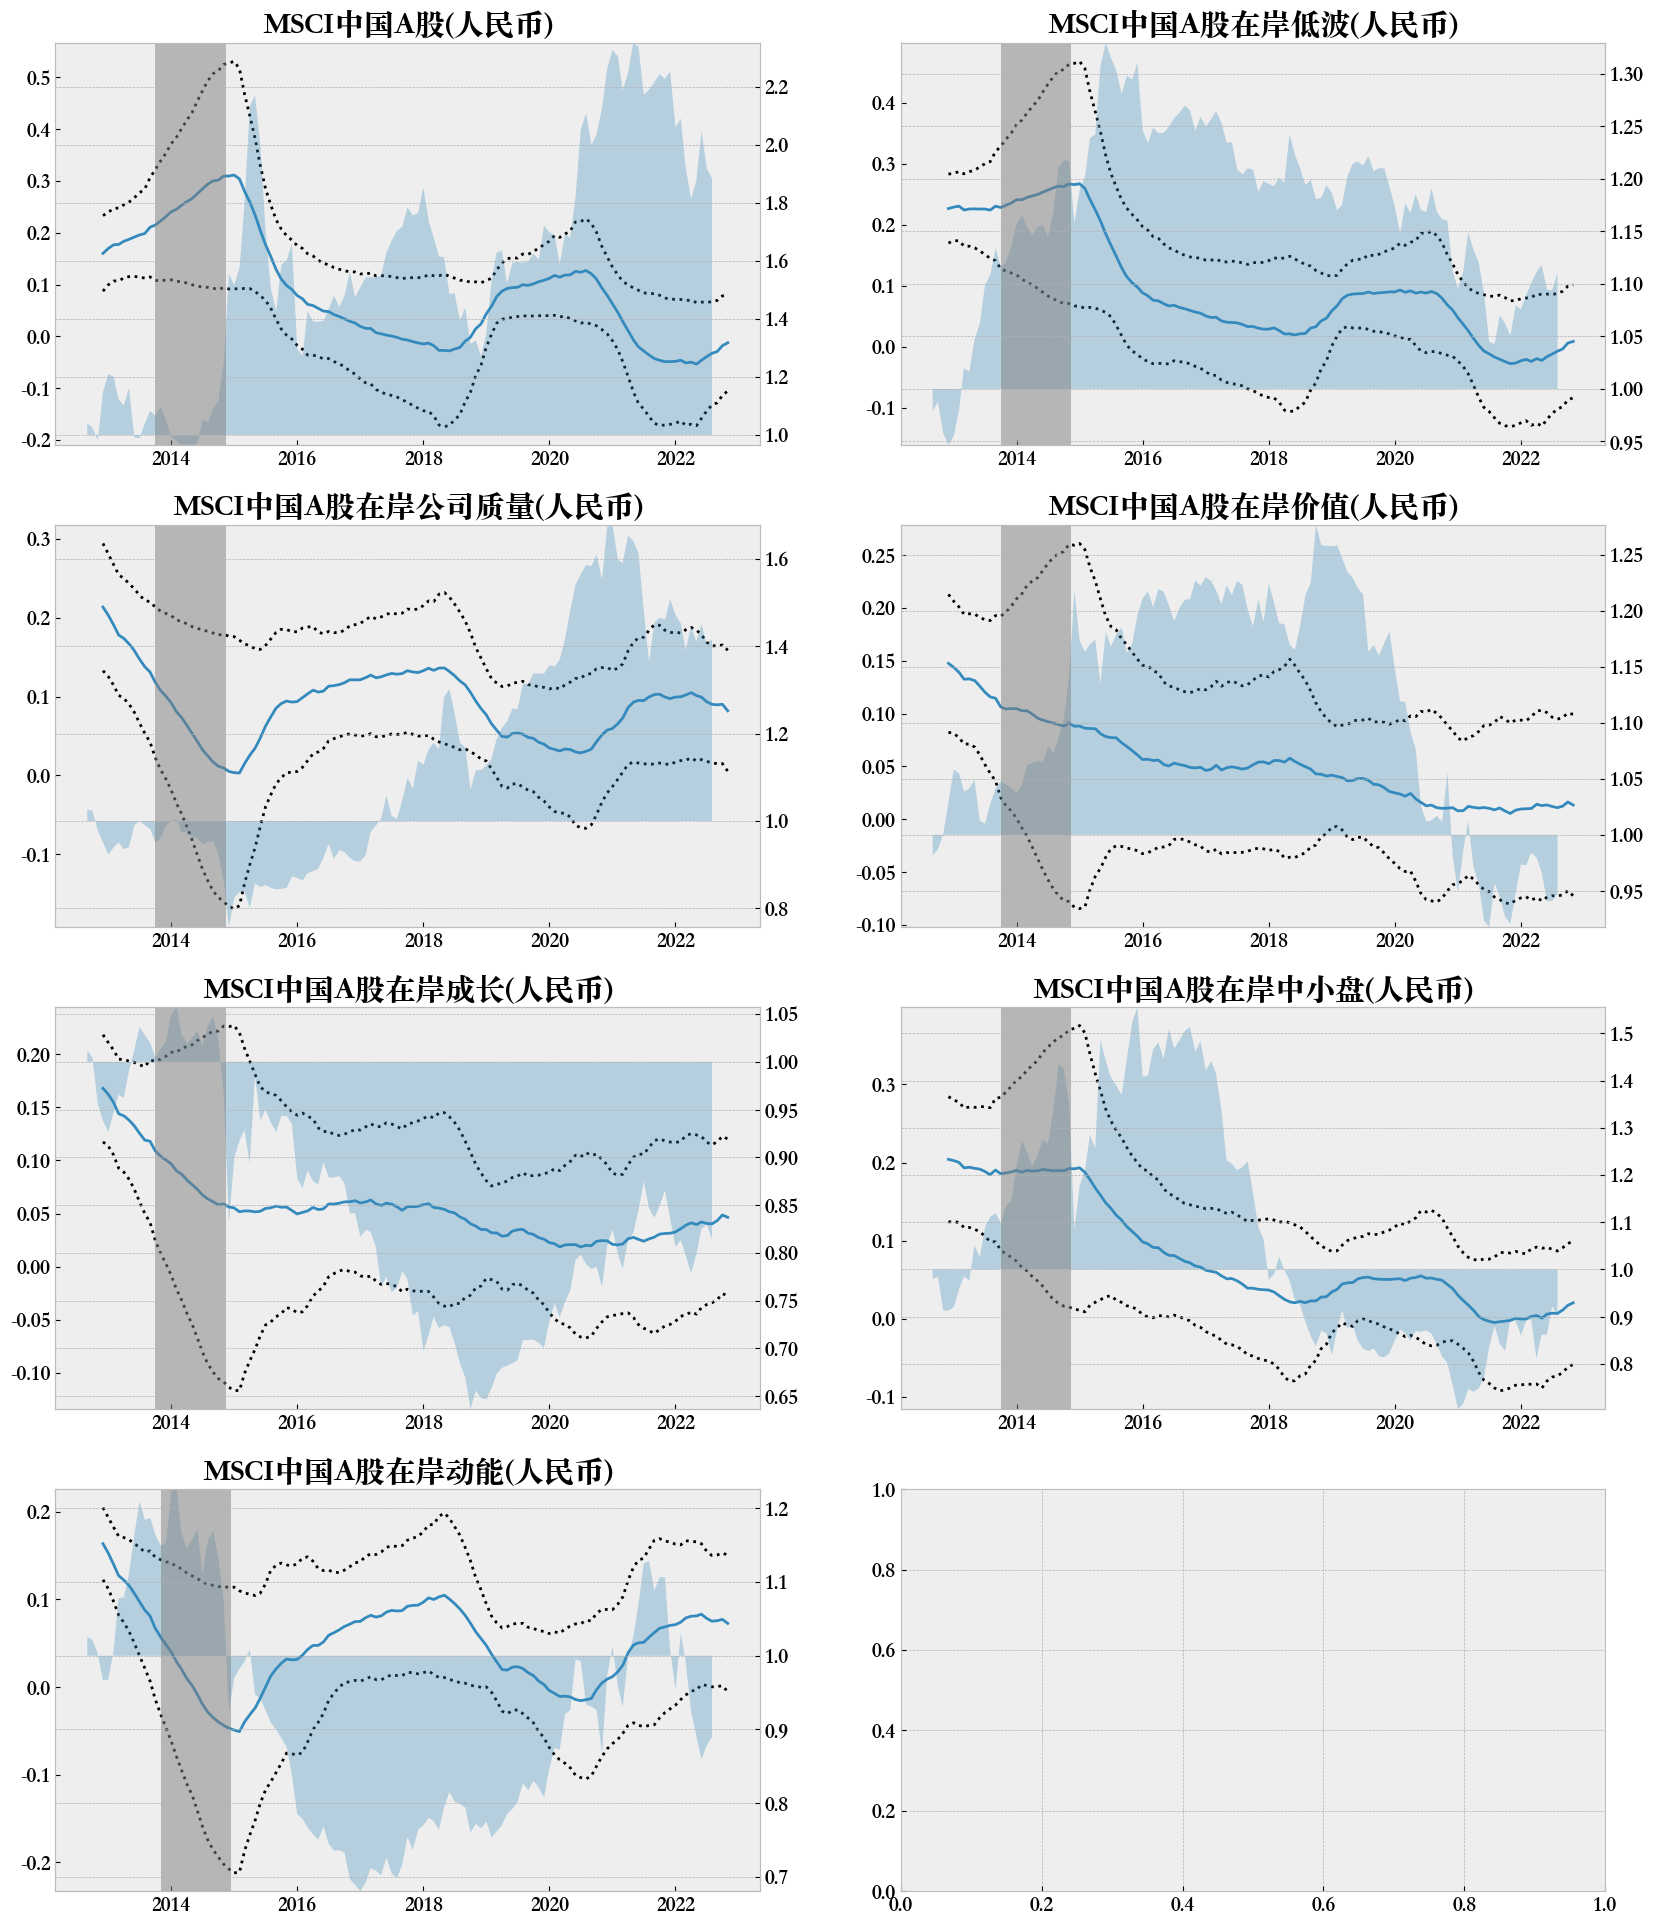

In [364]:
month_interval =(trace_alpha_total_dy.observed_data.date).astype('datetime64[ns]')[3]-(trace_alpha_total_dy.observed_data.date).astype('datetime64[ns]')[0]

fig,ax =plt.subplots(4,2,figsize=(20,4*6))
ax=ax.flatten()
SR_t_mean_fig=ppc_pred.predictions.stack()["SR_t:model"].mean(axis=2)
SR_t_std_fig=ppc_pred.predictions.stack()["SR_t:model"].std(axis=2)



TT_figure_predict=(ppc_pred.observed_data.date).astype('datetime64[ns]')+month_interval
TT_figure=(ppc_pred.observed_data.date).astype('datetime64[ns]')
data_fund=np.exp((Df_Factor/12).T.cumsum())
for i in range(fund_dim):
  
    idx=SR_t_std_fig[i]>np.quantile(SR_t_std_fig[i],0.95)
   
    
    ax[i].plot(TT_figure_predict,SR_t_mean_fig[i]+1*SR_t_std_fig[i],':',color="k")
    ax[i].plot(TT_figure_predict,SR_t_mean_fig[i])
    #ax[i].fill_between(TT_figure_predict,T_vol,0,alpha=0.3,color="r")
    
    ax[i].plot(TT_figure_predict,SR_t_mean_fig[i]-1*SR_t_std_fig[i],':',color="k")
    
     
    ax[i].set_title(Df_Factor.index.values[i])
    ax[i].grid()
    #ax[i].set_ylim([-2,2])
    
    ax_right = ax[i].twinx()
    
    #__drawdown =(draw_down_price[i] - draw_down_price[i+"_max"])/draw_down_price[i+"_max"]
    #print(__drawdown)
    ax_right.fill_between(TT_figure,data_fund[Df_Factor.index.values[i]],1,alpha=0.3)
    ax_right.set_ylim([data_fund[Df_Factor.index.values[i]].min(),data_fund[Df_Factor.index.values[i]].max()])
  
    #x_low=TT_figure[idx]-month_interval/3
    #x_high=TT_figure[idx]+month_interval/3
    
    #(TT_figure[idx][1:].values-TT_figure[idx][:-1].values)/2678400000000000
    
    
    betas =-SR_t_std_fig[i]
    threshold=-np.quantile(SR_t_std_fig[i],0.9)
    regimelist=regime_switch(betas,threshold)
    curr_reg = np.sign(betas[0]-threshold)
    for m in range(len(regimelist)-1):
        if curr_reg == 1:
            pass
            # uncomment below if we want to color the normal regimes
            #ax.axhspan(0, data.max(), xmin=regimelist[i]/regimelist[-1], xmax=regimelist[i+1]/regimelist[-1], 
             #         facecolor="green", alpha=0.3)
        else:
            ax_right.axhspan(0, data_fund[Df_Factor.index.values[i]].max(),  xmin=regimelist[m]/regimelist[-1], xmax=regimelist[m+1]/regimelist[-1], 
                       facecolor='gray', alpha=0.5)
        curr_reg = -1 * curr_reg
        
    
  
    
    
    #ax_right.fill_between(TT_figure[T_vol==2],data_fund[Df_Factor.index.values[i]][T_vol==2],1,alpha=0.6)
    

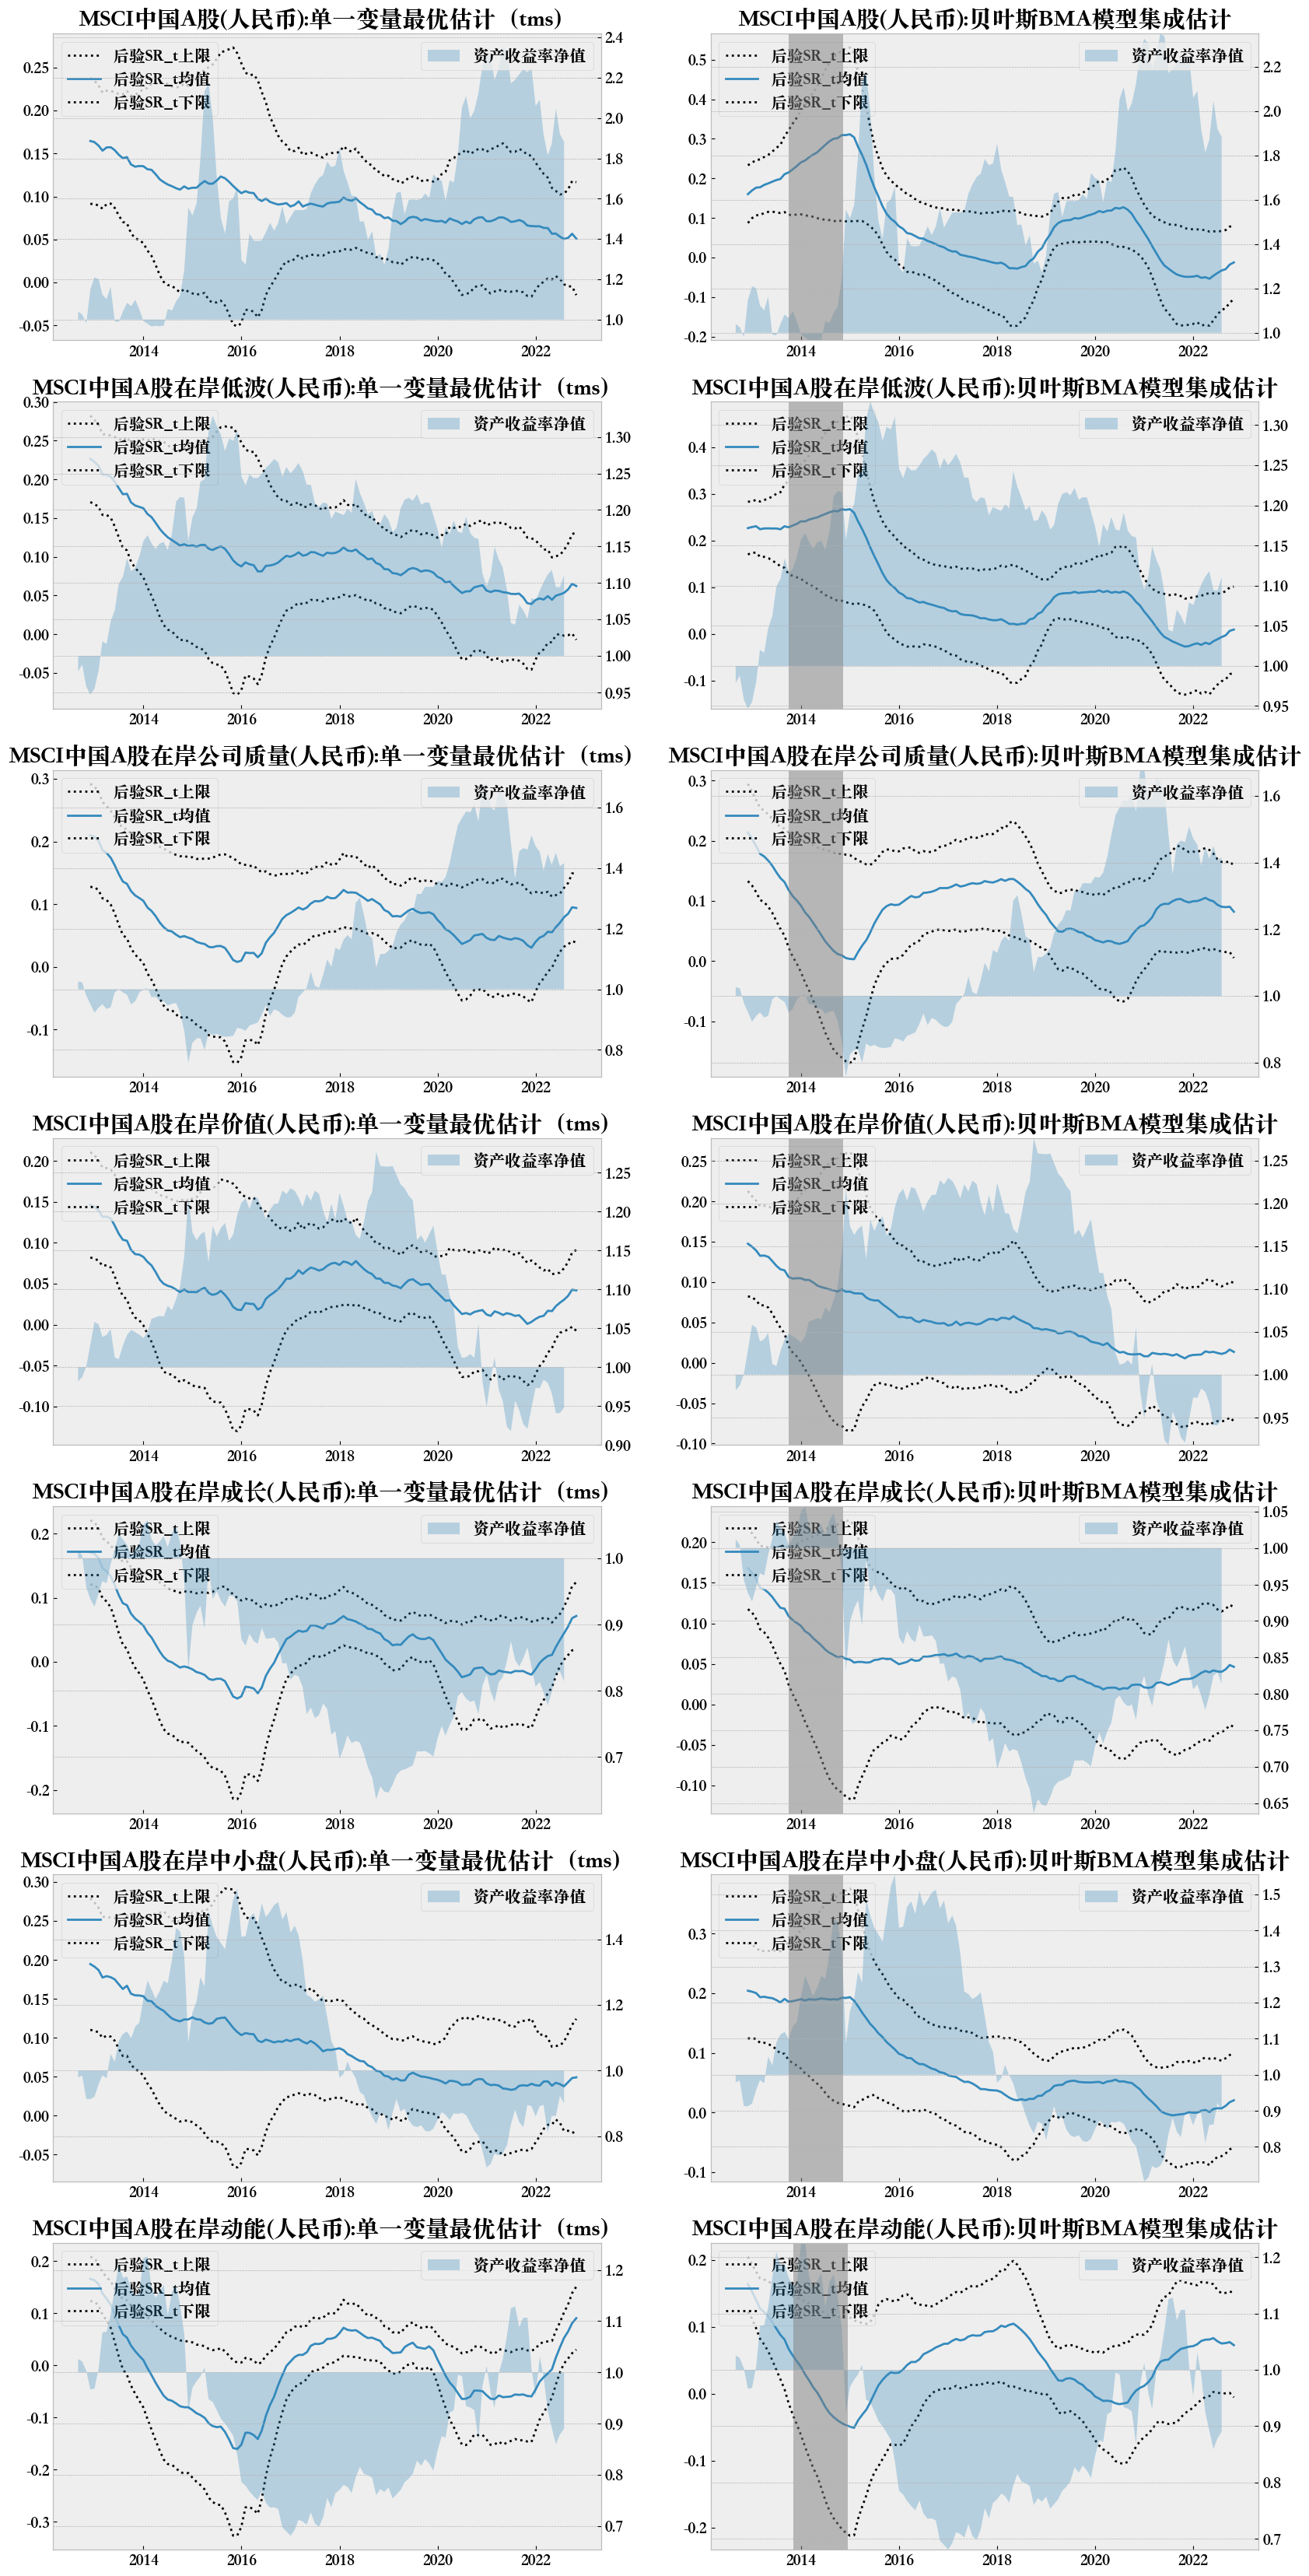

In [371]:
month_interval =(trace_alpha_total_dy.observed_data.date).astype('datetime64[ns]')[3]-(trace_alpha_total_dy.observed_data.date).astype('datetime64[ns]')[0]

fig,ax =plt.subplots(7,2,figsize=(20,7*6))

SR_t_mean_fig=ppc_pred.predictions.stack()["SR_t:model"].mean(axis=2)
SR_t_std_fig=ppc_pred.predictions.stack()["SR_t:model"].std(axis=2)



TT_figure_predict=(ppc_pred.observed_data.date).astype('datetime64[ns]')+month_interval
TT_figure=(ppc_pred.observed_data.date).astype('datetime64[ns]')
data_fund=np.exp((Df_Factor/12).T.cumsum())
for i in range(fund_dim):
  
    idx=SR_t_std_fig[i]>np.quantile(SR_t_std_fig[i],0.95)
   
    
    ax[i,1].plot(TT_figure_predict,SR_t_mean_fig[i]+1*SR_t_std_fig[i],':',color="k",label="后验SR_t上限")
    ax[i,1].plot(TT_figure_predict,SR_t_mean_fig[i],label="后验SR_t均值")
    #ax[i].fill_between(TT_figure_predict,T_vol,0,alpha=0.3,color="r")
    
    ax[i,1].plot(TT_figure_predict,SR_t_mean_fig[i]-1*SR_t_std_fig[i],':',color="k",label="后验SR_t下限")
    
     
    ax[i,1].set_title(Df_Factor.index.values[i]+":贝叶斯BMA模型集成估计")
    ax[i,1].grid()
    #ax[i].set_ylim([-2,2])
    ax[i,1].legend(loc=2)
    ax_right = ax[i,1].twinx()
    
    #__drawdown =(draw_down_price[i] - draw_down_price[i+"_max"])/draw_down_price[i+"_max"]
    #print(__drawdown)
    ax_right.fill_between(TT_figure,data_fund[Df_Factor.index.values[i]],1,alpha=0.3,label="资产收益率净值")
    ax_right.set_ylim([data_fund[Df_Factor.index.values[i]].min(),data_fund[Df_Factor.index.values[i]].max()])
    ax_right.legend(loc=1)
    #x_low=TT_figure[idx]-month_interval/3
    #x_high=TT_figure[idx]+month_interval/3
    
    #(TT_figure[idx][1:].values-TT_figure[idx][:-1].values)/2678400000000000
    
    
    betas =-SR_t_std_fig[i]
    threshold=-np.quantile(SR_t_std_fig[i],0.9)
    regimelist=regime_switch(betas,threshold)
    curr_reg = np.sign(betas[0]-threshold)
    for m in range(len(regimelist)-1):
        if curr_reg == 1:
            pass
            # uncomment below if we want to color the normal regimes
            #ax.axhspan(0, data.max(), xmin=regimelist[i]/regimelist[-1], xmax=regimelist[i+1]/regimelist[-1], 
             #         facecolor="green", alpha=0.3)
        else:
            ax_right.axhspan(0, data_fund[Df_Factor.index.values[i]].max(),  xmin=regimelist[m]/regimelist[-1], xmax=regimelist[m+1]/regimelist[-1], 
                       facecolor='gray', alpha=0.5)
        curr_reg = -1 * curr_reg
        
    
  
    
    
    #ax_right.fill_between(TT_figure[T_vol==2],data_fund[Df_Factor.index.values[i]][T_vol==2],1,alpha=0.6)

#fig,ax =plt.subplots(4,2,figsize=(20,4*6))
#ax=ax.flatten()
SR_t_mean_fig=trace_alpha_total_dy.posterior.stack(pooled_chain=("chain", "draw"))["SR_t:model"].mean(axis=2)
SR_t_std_fig=trace_alpha_total_dy.posterior.stack(pooled_chain=("chain", "draw"))["SR_t:model"].std(axis=2)


data_fund=np.exp((Df_Factor/12).T.cumsum())
for i in range(fund_dim):
  
    
    #TT_figure= _xx+T_begin
    
    
    ax[i,0].plot(TT_figure_predict,SR_t_mean_fig[i]+1*SR_t_std_fig[i],':',color="k",label="后验SR_t上限")
    ax[i,0].plot(TT_figure_predict,SR_t_mean_fig[i],label="后验SR_t均值")
    ax[i,0].plot(TT_figure_predict,SR_t_mean_fig[i]-1*SR_t_std_fig[i],':',color="k",label="后验SR_t下限")
    ax[i,0].set_title(Df_Factor.index.values[i]+":单一变量最优估计（tms）")
    ax[i,0].legend(loc=2)
    ax[i,0].grid()
    
    
    ax_right = ax[i,0].twinx()
    
    #__drawdown =(draw_down_price[i] - draw_down_price[i+"_max"])/draw_down_price[i+"_max"]
    #print(__drawdown)
    ax_right.fill_between(TT_figure,data_fund[Df_Factor.index.values[i]],1,alpha=0.3,label="资产收益率净值")
    ax_right.legend(loc=1)

In [104]:
ppc_pred_r.observed_data["_IC"].values.std(axis=1)

array([0.8455467 , 1.11655285, 0.90066765, 0.59049478, 0.81759459,
       0.77185607, 0.86804142, 0.87618074, 0.86428179, 0.95921491])

In [106]:
 az.plot_forest(
    trace_alpha_total_bm,
    var_names=["IC_alpha"],
    #kind="ridgeplot",
    combined=True,
    coords={"Alpha":__Df_alpha_model.index.values},
    labeller=az.labels.NoVarLabeller(),
)
    

In [268]:
#az.extract(trace_alpha_total_bm,group="posterior_predictive", var_names="_IC", combined=True).std(axis=2).T.to_dataframe()["_IC"].unstack()


# 配置资产配置回撤模块（数据模块）

## 回撤收益数据

In [107]:

data_predict_r=pd.concat([Df_Factor,__Df_alpha_model]).T

## 相关系数

In [108]:


correlation = pd.concat([Df_Factor,__Df_alpha_model]).T.corr()
correlation.style.background_gradient(cmap=cm).format("{:.2f}", na_rep='MISS')

## 经典收益计算规则

In [282]:
df_data_r_backtest = pd.DataFrame(columns = ["Period"]).set_index("Period")
df_data_r_backtest.index=pd.date_range(start="2012-09-01",end="2022-09-01",freq="M").to_period("M")
df_data_r_backtest["Test_"] = "True"
index_adj=index_transformer
###指数与风格的收益率、方差（滚动36个月回归）
df_ret_ratio_mean_yearly=(index_adj.resample("M").sum()*12).rolling(36).mean()
###波动率计算规则方法1:
#df_ret_ratio_std_yearly=(np.sqrt((index_adj**2).resample("M").sum())*np.sqrt(12)).rolling(36).mean()
###波动率计算规则方法2:
df_ret_ratio_std_yearly=((index_adj.resample("M").sum()*12).rolling(36).std()/np.sqrt(12))


data_alpha_mean_yearly=(data_alpha_filter*12).rolling(36).mean()
data_alpha_std_yearly=(data_alpha_filter*12).rolling(36).std()/np.sqrt(12)






df_data_r_backtest_mean = pd.concat([df_data_r_backtest,df_ret_ratio_mean_yearly,data_alpha_mean_yearly],axis=1).query('Test_=="True"')
df_data_r_backtest_std = pd.concat([df_data_r_backtest,df_ret_ratio_std_yearly,data_alpha_std_yearly],axis=1).query('Test_=="True"')




df_data_r_backtest_mean1 = df_data_r_backtest_mean.drop("Test_",axis=1).T
df_data_r_backtest_std1 = df_data_r_backtest_std.drop("Test_",axis=1).T


index_T = np.arange(len(data_alpha_mean_yearly))
index_mean=df_data_r_backtest_mean1.mean(axis=1)
index_std=df_data_r_backtest_std1.mean(axis=1)
columns_name=df_data_r_backtest_mean1.columns
for i in index_T:
    j = columns_name[i]
    df_data_r_backtest_mean1[j]=index_mean.values
    df_data_r_backtest_std1[j]=index_std.values

/var/folders/bg/h2_d2l2939102wvpkt70y0_00000gn/T/ipykernel_14072/4258165518.py:13: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Test_'], dtype='object')
  data_alpha_mean_yearly=(data_alpha_filter*12).rolling(36).mean()
/var/folders/bg/h2_d2l2939102wvpkt70y0_00000gn/T/ipykernel_14072/4258165518.py:14: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Test_'], dtype='object')
  data_alpha_std_yearly=(data_alpha_filter*12).rolling(36).std()/np.sqrt(12)


In [120]:
df_data_r_backtest_mean1.T.mean()

MSCI中国A股(人民币)          0.043486
MSCI中国A股在岸低波(人民币)      0.012253
MSCI中国A股在岸公司质量(人民币)    0.042950
MSCI中国A股在岸价值(人民币)     -0.001879
MSCI中国A股在岸成长(人民币)     -0.024640
MSCI中国A股在岸中小盘(人民币)    -0.020464
MSCI中国A股在岸动能(人民币)     -0.013335
交银趋势混合A                0.220640
浦银安盛精致生活混合             0.139454
景顺长城中小盘混合              0.111998
金鹰红利价值混合A              0.117905
南方上证380ETF联接A          0.073597
金鹰中小盘精选混合              0.116857
融通内需驱动混合A/B            0.120513
国泰价值经典灵活配置混合(LOF)      0.168470
国泰金鹰增长灵活配置混合           0.145513
华夏盛世混合                 0.044050
dtype: float64

In [121]:
df_data_r_backtest_std1.T.mean()

MSCI中国A股(人民币)          0.200323
MSCI中国A股在岸低波(人民币)      0.050285
MSCI中国A股在岸公司质量(人民币)    0.094102
MSCI中国A股在岸价值(人民币)      0.046326
MSCI中国A股在岸成长(人民币)      0.077863
MSCI中国A股在岸中小盘(人民币)     0.127068
MSCI中国A股在岸动能(人民币)      0.098186
交银趋势混合A                0.255001
浦银安盛精致生活混合             0.322716
景顺长城中小盘混合              0.257677
金鹰红利价值混合A              0.161461
南方上证380ETF联接A          0.237307
金鹰中小盘精选混合              0.220082
融通内需驱动混合A/B            0.259329
国泰价值经典灵活配置混合(LOF)      0.251913
国泰金鹰增长灵活配置混合           0.246171
华夏盛世混合                 0.285355
dtype: float64

In [123]:
#data_obs_std.index.astype('datetime64[ns]').to_period("M")

## 贝叶斯后验的均值和方差


In [140]:
###指数与风格的收益率、
data_obs_mean=az.extract(ppc_pred_r,group="predictions", var_names="obs", combined=False).mean(axis=2).T.to_dataframe()["obs"].unstack()
data_obs_mean.index =data_obs_mean.index.astype('datetime64[ns]').to_period("M")-3

###指数与风格的标准差
data_obs_std=np.sqrt(12)*(az.extract(ppc_pred_r,group="predictions", var_names="obs", combined=False)/12).std(axis=2).T.to_dataframe()["obs"].unstack()
data_obs_std.index =data_obs_std.index.astype('datetime64[ns]').to_period("M")-3


###基金的的后验收益率、
data_IC_mean=az.extract(ppc_pred_r,group="predictions", var_names="_IC", combined=False).mean(axis=2).T.to_dataframe()["_IC"].unstack()
data_IC_mean.index =data_IC_mean.index.astype('datetime64[ns]').to_period("M")-3

###基金的后验标准差
data_IC_std=np.sqrt(12)*(az.extract(ppc_pred_r,group="predictions", var_names="_IC", combined=False)/12).std(axis=2).T.to_dataframe()["_IC"].unstack()
data_IC_std.index =data_IC_std.index.astype('datetime64[ns]').to_period("M")-3




df_data_r_backtest = pd.DataFrame(columns = ["Period"]).set_index("Period")
df_data_r_backtest.index=pd.date_range(start="2012-09-01",end="2022-09-01",freq="M").to_period("M")
df_data_r_backtest["Test_"] = "True"



df_data_r_backtest_mean = pd.concat([df_data_r_backtest,data_obs_mean,data_IC_mean],axis=1).query('Test_=="True"')
df_data_r_backtest_std = pd.concat([df_data_r_backtest,data_obs_std,data_IC_std],axis=1).query('Test_=="True"')




df_data_r_backtest_mean2 = df_data_r_backtest_mean.drop("Test_",axis=1).T
df_data_r_backtest_std2 = df_data_r_backtest_std.drop("Test_",axis=1).T

In [627]:
#df_data_r_backtest_mean2.loc["MSCI中国A股在岸价值(人民币)"].plot()

Fund                 MSCI中国A股(人民币)  MSCI中国A股在岸低波(人民币)  MSCI中国A股在岸公司质量(人民币)  \
date                                                                         
1346457600000000000       0.135237           0.045216             0.062243   
1349049600000000000       0.143369           0.043586             0.098120   
1351728000000000000       0.132494           0.045841             0.070518   
1354320000000000000       0.109623           0.051515             0.039639   
1356998400000000000       0.139173           0.044707             0.030700   
...                            ...                ...                  ...   
1648771200000000000       0.056025          -0.000677             0.002849   
1651363200000000000       0.001925          -0.008723             0.020398   
1654041600000000000       0.056925          -0.012739             0.025218   
1656633600000000000       0.028608          -0.009219             0.013556   
1659312000000000000       0.068511          -0.014499             0.022800   

Fund                 MSCI中国A股在岸价值(人民币)  MSCI中国A股在岸成长(人民币)  MSCI中国A股在岸中小盘(人民币)  \
date                                                                            
1346457600000000000           0.040422           0.066814            0.114031   
1349049600000000000           0.044200           0.052511            0.103087   
1351728000000000000           0.050443           0.037854            0.100378   
1354320000000000000           0.034542           0.058632            0.111003   
1356998400000000000           0.055829           0.024662            0.115367   
...                                ...                ...                 ...   
1648771200000000000          -0.026867           0.027664           -0.021096   
1651363200000000000          -0.021434           0.019045           -0.001620   
1654041600000000000          -0.019113           0.020493            0.025531   
1656633600000000000          -0.018153           0.041291            0.011770   
1659312000000000000          -0.024908           0.054891            0.017098   

Fund                 MSCI中国A股在岸动能(人民币)  
date                                    
1346457600000000000           0.055208  
1349049600000000000           0.082300  
1351728000000000000           0.073321  
1354320000000000000           0.056738  
1356998400000000000           0.055366  
...                                ...  
1648771200000000000           0.006073  
1651363200000000000          -0.007808  
1654041600000000000           0.010958  
1656633600000000000           0.024072  
1659312000000000000           0.039700  

[120 rows x 7 columns]

In [180]:
###指数与风格的收益率、
data_obs_mean3=az.extract(trace_alpha_total_tms,group="predictions", var_names="obs", combined=True).mean(axis=2).T.to_dataframe()["obs"].unstack()
data_obs_mean3.index =data_obs_mean.index.astype('datetime64[ns]').to_period("M")-3

###指数与风格的标准差
data_obs_std3=np.sqrt(12)*(az.extract(trace_alpha_total_tms,group="predictions", var_names="obs", combined=True)/12).std(axis=2).T.to_dataframe()["obs"].unstack()
data_obs_std3.index =data_obs_std.index.astype('datetime64[ns]').to_period("M")-3


###基金的的后验收益率、
data_IC_mean3=az.extract(trace_alpha_total_tms,group="predictions", var_names="_IC", combined=True).mean(axis=2).T.to_dataframe()["_IC"].unstack()
data_IC_mean3.index =data_IC_mean3.index.astype('datetime64[ns]').to_period("M")-3

###基金的后验标准差
data_IC_std3=np.sqrt(12)*(az.extract(trace_alpha_total_tms,group="predictions", var_names="_IC", combined=True)/12).std(axis=2).T.to_dataframe()["_IC"].unstack()
data_IC_std3.index =data_IC_std3.index.astype('datetime64[ns]').to_period("M")-3


df_data_r_backtest_mean3 = pd.concat([df_data_r_backtest,data_obs_mean3,data_IC_mean3],axis=1).query('Test_=="True"')
df_data_r_backtest_std3 = pd.concat([df_data_r_backtest,data_obs_std3,data_IC_std3],axis=1).query('Test_=="True"')




df_data_r_backtest_mean3 = df_data_r_backtest_mean3.drop("Test_",axis=1).T
df_data_r_backtest_std3 = df_data_r_backtest_std3.drop("Test_",axis=1).T

In [629]:
#df_data_r_backtest_mean1.loc["MSCI中国A股在岸价值(人民币)"].plot()

In [630]:
#df_data_r_backtest_std2.T.mean()

# 配置资产均值方差模块

In [127]:
import sys
sys.path.append("/Users/xinyuexu/Public/multi_asset/编程学习/financial_course/finance-courses")
import edhec_risk_kit_FOF as erk

In [549]:
#erk.summary_stats(pd.DataFrame(T_total)["2013":]).style.background_gradient(cmap=cm).format("{:.3f}", na_rep='MISS')

In [128]:

def weight_minvar(ret,cov):
    '''
    Produces the weights of the Minimum Volatility Portfolio given a covariance matrix of the returns 
    '''
    return erk.minimize_volatility(ret, cov)

def weight_maxsharpe(ret,cov, periods_per_year=1, risk_free_rate=0):
    '''
    Produces the weights of the Maximum Sharpe Ratio Portfolio given a covariance matrix of the returns 
    '''
    est_cov = cov
   
    ann_ret=np.squeeze(ret)
    return erk.maximize_shape_ratio_robust(ann_ret, est_cov, risk_free_rate=risk_free_rate, periods_per_year=periods_per_year)



def weight_ew(ret,cov, cap_ws=None, max_cw_mult=None, microcap_thr=None, **kwargs):
    """
    Returns the weights of the Equally-Weighted (EW) portfolio based on the asset returns "r" as a DataFrame. 
    If the set of cap_ws is given, the modified scheme is computed, i.e., 
    microcaps are removed and a capweight tether applied.
    """
    r =ret.T
    ew = pd.Series(1/len(r.columns), index=r.columns)
    if cap_ws is not None:
        cw = cap_ws.loc[r.index[0]] # starting cap weight
        if microcap_thr is not None and microcap_thr > 0.0:
            # exclude microcaps according to the threshold    
            ew[ cw < microcap_thr ] = 0
            ew = ew / ew.sum()
        if max_cw_mult is not None and max_cw_mult > 0:
            # limit weight up to a multiple of capweight
            ew = np.minimum(ew, cw*max_cw_mult)
            ew = ew / ew.sum()
    return ew







def backtest_weight_scheme(r,Ret,Std,window=36,weight_scheme=weight_ew, **kwargs):
    '''
    Backtests a given weighting scheme. Here:
    - r: asset returns to use to build the portfolio
    - window: the rolling window used
    - weight_scheme: the weighting scheme to use, it must the name of a 
    method that takes "r", and a variable number of keyword-value arguments
    '''
    n_periods = r.shape[0]
    windows = [ (start, start+window) for start in range(0,n_periods-window) ]
    weights=[]
    
    
    for win in windows: 
        
        index=win[1]
        ret =Ret.iloc[[index]].T
        ret_sd = np.expand_dims(Std.iloc[index].values, axis=1)  
        cov = ret_sd.dot(ret_sd.T)*correlation  
        weight = weight_scheme(ret,cov,**kwargs)
        weights.append(weight)
        
    weights = pd.DataFrame(weights, index=r.iloc[window:].index, columns=r.columns)    
    returns = (weights * r).sum(axis=1,  min_count=1) #mincount is to generate NAs if all inputs are NAs
    return weights,returns

In [384]:

# f,ax= plt.subplots(1,1,figsize=(20,12))
# T_total ={}
# for i in weight_ALL.index:
    
#     T_return =(df_returns_ratio.replace(np.nan,0).dot(weight_ALL.loc[i])+1).cumprod()
#     ax.plot(((df_returns_ratio.replace(np.nan,0).dot(weight_ALL.loc[i])+1).cumprod()),label=i)
#     T_total[i]=((df_returns_ratio.replace(np.nan,0).dot(weight_ALL.loc[i])))
# ax.legend(loc=2)

In [227]:
Ret2 = df_data_r_backtest_mean2.T
Ret1 = df_data_r_backtest_mean1.T

In [425]:
weight_ALL={}

r_ALL={}

Ret = df_data_r_backtest_mean2.T
Std = df_data_r_backtest_std2.T
weights,returns = backtest_weight_scheme(data_predict_r,Ret,Std,window=36, weight_scheme=weight_ew)
#weight_ALL["等权重"]= weights
#r_ALL["等权重"]= returns
#weights,returns = backtest_weight_scheme(data_predict_r,Ret,Std,window=36, weight_scheme=weight_minvar)
#weight_ALL["最小方差:贝叶斯后验"]= weights
#r_ALL["最小方差:贝叶斯后验分布"]= returns




#weights.mean(axis=0).plot.bar()


In [426]:
Ret3 = df_data_r_backtest_mean3.T
Std3 = df_data_r_backtest_std3.T

#weights,returns = backtest_weight_scheme(data_predict_r,Ret,Std,window=36, weight_scheme=weight_minvar)
#weight_ALL["最小方差:传统滚动36个月分布"]= weights
#r_ALL["最小方差:传统滚动36个月分布"]= returns


weights,returns = backtest_weight_scheme(data_predict_r,Ret3,Std3,window=36, weight_scheme=weight_maxsharpe)
weight_ALL["最大夏普MV模型:贝叶斯后验：最优宏观变量tms"]= weights
r_ALL["最大夏普MV模型:贝叶斯后验:最优宏观变量tms"]= returns
#weights.mean(axis=0).plot.bar()
#np.exp(returns.cumsum()/12).plot()

df_Wight_all =pd.concat(weight_ALL).groupby(level=0).mean()




In [427]:
Ret2 = df_data_r_backtest_mean2.T
Std2 = df_data_r_backtest_std2.T


In [428]:
# weigts = pd.concat(weight_ALL).groupby(level=0).mean().T
# loc="center left", bbox_to_anchor=(1, 0.5)

# .plot.bar()

<AxesSubplot: >

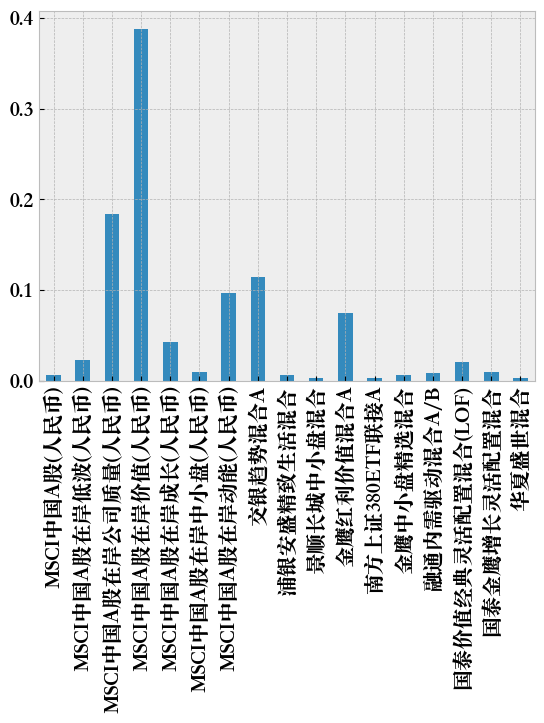

In [429]:
weights,returns = backtest_weight_scheme(data_predict_r,Ret2,Std2,window=36, weight_scheme=weight_maxsharpe)
weight_ALL["最大夏普MV模型:贝叶斯后验BMA"]= weights
r_ALL["最大夏普MV模型:贝叶斯后验分布BMA"]= returns

weights.mean(axis=0).plot.bar()

In [431]:
Ret = df_data_r_backtest_mean1.T
Std = df_data_r_backtest_std1.T

#weights,returns = backtest_weight_scheme(data_predict_r,Ret,Std,window=36, weight_scheme=weight_minvar)
#weight_ALL["最小方差:传统滚动36个月分布"]= weights
#r_ALL["最小方差:传统滚动36个月分布"]= returns


weights,returns = backtest_weight_scheme(data_predict_r,Ret,Std,window=36, weight_scheme=weight_maxsharpe)
weight_ALL["最大夏普MV模型:样本均值方差"]= weights
r_ALL["最大夏普MV模型:样本均值方差"]= returns
#weights.mean(axis=0).plot.bar()
#np.exp(returns.cumsum()/12).plot()

#weights.mean(axis=0).plot.bar()

In [493]:
weight_all_mean = {}
for i in weight_ALL.keys():
    weight_all_mean[i]= weight_ALL[i].mean(axis=0)

weight_all_mean=pd.DataFrame(weight_all_mean).T

weight_all_mean=weight_all_mean.iloc[[2,0,1]]

cm_=sns.color_palette("Spectral",17)
#pd.DataFrame(weight_ALL).T.plot.bar(grid=True, figsize=(20,5),rot=45)



fig,ax =plt.subplots(figsize=(20,10))
x= np.zeros_like(weight_all_mean["MSCI中国A股(人民币)"].values)

for j,i in enumerate(weight_all_mean.columns):
   
    #print(i)
   
    ax.bar(weight_all_mean.index,weight_all_mean[i].values,bottom=x,width=0.15,label=i)
    x= x+weight_all_mean[i].values
ax.set_ylabel("权重")
ax.set_title("平均配置占比")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



<AxesSubplot: >

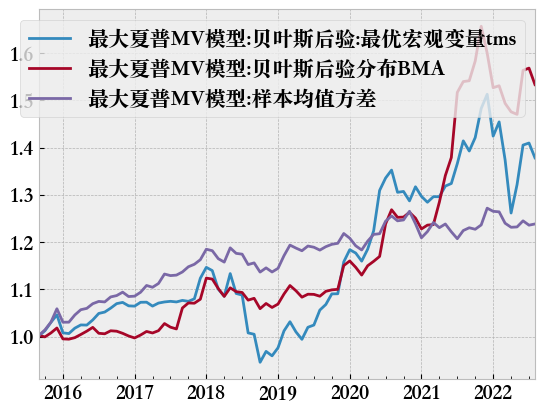

In [313]:
np.exp(pd.concat(r_ALL,axis=1).dropna().cumsum()/12).plot()

In [432]:
pd.concat(r_ALL,axis=1).dropna().dropna()

最大夏普MV模型:贝叶斯后验:最优宏观变量tms  最大夏普MV模型:贝叶斯后验分布BMA  最大夏普MV模型:样本均值方差
2015-09                  0.022173             0.031349         0.035845
2015-10                  0.130458            -0.035394         0.137939
2015-11                  0.207472             0.100345         0.191328
2015-12                  0.182348             0.123672         0.325172
2016-01                 -0.443500            -0.274868        -0.326803
...                           ...                  ...              ...
2022-04                 -1.023937            -0.144639        -0.083215
2022-05                  0.558790            -0.043535         0.007122
2022-06                  0.735557             0.735557         0.124744
2022-07                  0.037498             0.037498        -0.088490
2022-08                 -0.270451            -0.270451         0.024962

[84 rows x 3 columns]

In [343]:
table =erk.summary_stats(pd.concat(r_ALL,axis=1).dropna()/12,risk_free_rate=0,periods_per_year=12, var_level=0.05).style.format("{:.3f}", na_rep='MISS')

In [346]:
table.to_excel("FOF_backtesting_result.xlsx")
#weights.sum(axis=0).plot.bar()

In [641]:
#data_predict_r.mean(axis=1)

In [606]:


def decompose_r_static_dynamic(weight_i,r_i):
    r = weight_i*r_i_compose_
    r_total = r.sum(axis=1)
    r_Total = r_total.mean()
    
    r_static = weight_i.mean(axis=0)*r_i_compose_.mean(axis=0)
    r_static_Total = r_static.sum()
    
    COV=0
    for i in weight_i_compose.columns:
        cov=np.cov(weight_i_compose[i],r_i_compose_[i],ddof=0)[1,0]
        COV=COV+cov
    r_dynamic_Total =COV
    
    return r_Total,r_static_Total,r_dynamic_Total
    
    

In [634]:
performance_attribution={}

for i in weight_ALL.keys():

    weight_i_compose=weight_ALL[i]
    r_i_compose_=data_predict_r.loc[weight_i_compose.index]
    r,r_static,r_dynamic=decompose_r_static_dynamic(weight_i_compose,r_i_compose_)
    performance_attribution[i] = [r,r_static,r_dynamic]

PA = pd.DataFrame.from_dict(performance_attribution)

PA.index =["总收益","配置收益","择时收益"]

PA.T.iloc[[2,0,1]].to_excel("收益来源分析.xlsx")

# 风格因子原序列与指数序列回归之后的序列比例关系

In [174]:
from WindPy import *

w.start()
w.isconnected()
from datetime import date
today_for_api  = str(date.today())
begin_for_api  = "2005-01-01"
import pandas as pd
data_code = pd.read_excel("/Users/xinyuexu/Public/multi_strategy/wind金融数据.xlsx",sheet_name="WSD_数据字段")
data_code = data_code.query("FOF研究==1")
name= data_code[["代码","名称"]].set_index("代码").to_dict()
str_code_=""
for i,j in enumerate(data_code["代码"]):
        
    if i >0:
        str_code_ = str_code_+","+str(j)
    else:
        str_code_ = str_code_+str(j)

        
error,df= w.edb(str_code_, begin_for_api, today_for_api, "Fill=Previous",usedf=True);
#error,_data_ = w.wsd(str_code_, "close", "2022-01-01", today_for_api, "PriceAdj=F",usedf=True);
df.index =pd.to_datetime(df.index,infer_datetime_format=True).to_period("D")

df=df.rename(columns=name["名称"])

df_ret_ratio=np.log(df)-np.log(df.shift(1))

df_ret_ratio_mean_monthly=df_ret_ratio.resample("M").sum()
df_ret_ratio_std_monthly=np.sqrt((df_ret_ratio**2).resample("M").sum())
df_sharpe =df_ret_ratio_mean_monthly/df_ret_ratio_std_monthly

df_sharpe.mean()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2021 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


MSCI中国A股(人民币)          0.150753
MSCI中国A股在岸低波(人民币)      0.161999
MSCI中国A股在岸公司质量(人民币)    0.189210
MSCI中国A股在岸价值(人民币)      0.155425
MSCI中国A股在岸成长(人民币)      0.187682
MSCI中国A股在岸中小盘(人民币)     0.217424
MSCI中国A股在岸动能(人民币)      0.104623
dtype: float64

In [175]:
from utility_data_deal import orthogonalized_factors
factor_adj,index_adj,beta=orthogonalized_factors(df_ret_ratio,df_ret_ratio.columns[0],df_ret_ratio.columns[1:])
df_ret_ratio= df_ret_ratio.dropna()

# 回归关系

In [278]:
df_data_predict = pd.DataFrame(columns = ["Period"]).set_index("Period")
date_model_predict =pd.date_range(start="2017-09-01",end="2022-09-01",freq="M").to_period("M")
df_data_predict.index=date_model_predict


# df_data["Test_"] = "True"



# df_macro_filter = pd.concat([df_data,macro_zscore.shift(3)],axis=1).query('Test_=="True"')
# df_macro_filter_predict = pd.concat([df_data,macro_zscore],axis=1).query('Test_=="True"')

# df_Factor_filter=pd.concat([df_data,index_transformer_month],axis=1).query('Test_=="True"')
# data_alpha_filter =pd.concat([df_data,df_fund],axis=1).query('Test_=="True"')
# data_alpha_filter= data_alpha_filter.dropna(axis=1)


